# Assignment #3 - Reinforcement Learning

### <font color="red"> DUE: Mar 19 (Monday) 11:00 pm </font>  

<font color="blue"> Rajendra Jadi </font>

# I. Overview


The objective of this assignment is understand and implement **Reinforcement Learning** approaches to solve following problems:

** Maze **:
<br>  Maze problem is to find the best valid path to the goal state given a start state . The goal state is represented by a 'G', walls are represented with 'H',and open spaces with 'O'(I will be representing the start state with an 'S').

** BlackJack **:
<br> Blackjack is popular card game where the goal is to obtain cards that sum to as near as possible to 21 without going over. They’re playing against a fixed dealer. Here are the rules of the game:

Face cards (Jack, Queen, King) have point value 10. Aces can either count as 11 or 1, and it’s called ‘usable’ at 11. This game is placed with an infinite deck (or with replacement). The game starts with each (player and dealer) having one face up and one face down card.

For each of the above problems, two classes are defined - 
1. Environment Class - Environment class keeps track of current state and its associated attributes.
2. Agent class performs the actions using Reinforcement Learning. 

The implementation details are defined in following sections. The experiment includes training the agent and then the model is tested against the problem. In later sections experiments are performed with combination of parameters to determine optimal values.

# II. Problems 

## A. Maze Problem (Practice)

Describe the problem. Read the following code and explain the GridWorld environment. 

### Problem description - Maze problem 

The Maze problem is to find the shortest valid path to the goal state given a start state . The goal state is represented by a 'G', walls are represented with 'H',and open spaces with 'O'(I will be representing the start state with an 'S'). 

The GridWorld class reads in a 'maze' from a supplied text file and supplies various functions to support interaction with the maze including a next function which transitions the current state to a new state using the supplied action. 

Rewards are as follows: G = 30, O = -1, H and others = -5. For convenience I've added some additional code to more easily track the goal and start positions.

In [13]:
import collections
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Sample Grid Environment File

Simple text file with three characters, 'O', 'H', and 'G'.
- 'O': open space
- 'H': Wall or obstacles
- 'G': Goal location 

The goal state is represented by a 'G', walls are represented with 'H',and open spaces with 'O'(I will be representing the start state with an 'S').

In [11]:
%%bash 
cat grid.txt

OOOHOOOOO
OOOHOOHOO
OOOOOOHOO
OOOOHHHOO
OOHOOOOOH
OOHOOOGOO
OOOOOOOOO

### GridWorld Environment - Explains the GridWorld

Plsease find below grid world class. The GridWorld environment class defines the maze environment. The two method are "check_state" and "next". Logic implemented by these methods is:

** next **: Based on the given action the next method updates current state. If the new state is a Hurdle (H) or is outside the maze (N), the method will return -5 reward. For an invalid state (F) also, it will return -5. For the Goal State (G), the method will return +30 reward, otherwise for a normal step else it will return -1 reward

check_state: This checks whether a state is a valid state. If the indices are going outside the grid, method will return "N". If the grid is invalid, it will return "F". The method will take a 2d array as parameter, containing indices in the grid. 



### GridWorld Class


### 	explanation of the codes
** init**: intialized the grid
<br> **get_cur_state**: returns current state of the grid
<br> **get_size** : get size of the grid
<br> **read_map**: reads the input 
<br> **print_map**: prints th grid
<br> **is_goal**: check if the goal state is reached
<br> **get_actions** : returns action of the agent

In [14]:
# maze example

class GridWorld:
    """ Grid World environment
            there are four actions (left, right, up, and down) to move an agent
            In a grid, if it reaches a goal, it get 30 points of reward.
            If it falls in a hole or moves out of the grid world, it gets -5.
            Each step costs -1 point. 

        Parameters
        ==========
        _map        ndarray
                    string array read from a file input
        _size       1d array
                    the size of _map in ndarray
        goal_pos    tuple
                    the index for the goal location
        _actions    list
                    list of actions for 4 actions
        _s          1d array
                    current state
    """
    def __init__(self, fn):
        # read a map from a file
        self._map = self.read_map(fn)
        self._size = np.asarray(self._map.shape)
        self.goal_pos = np.where(self._map == 'G')

        # definition of actions (left, right, up, and down repectively)
        self._actions = [[0, -1], [0, 1], [-1, 0], [1, 0]]
        self._s = None

    def get_cur_state(self):
        return self._s

    def get_size(self):
        return self._size

    def read_map(self, fn):
        grid = []
        with open(fn) as f:
            for line in f:
                grid.append(list(line.strip()))
        return np.asarray(grid)

    def print_map(self):
        print( self._map )

    def check_state(self, s):
        if isinstance(s, collections.Iterable) and len(s) == 2:
            if s[0] < 0 or s[1] < 0 or\
               s[0] >= self._size[0] or s[1] >= self._size[1]:
                return 'N'
            return self._map[tuple(s)].upper()
        else:
            return 'F'  # wrong input

    def init(self, state=None):
        if state is None:
            s = [0, 0]
        else:
            s = state

        if self.check_state(s) == 'O':
            self._s = np.asarray(state)
        else:
            raise ValueError("Invalid state for init")

    def next(self, a):
        s1 = self._s + self._actions[a]
        # state transition
        curr = self.check_state(s1)
        
        if curr == 'H' or curr == 'N':
            return -5
        elif curr == 'F':
            warnings.warn("invalid state " + str(s1))
            return -5
        elif curr == 'G':
            self._s = s1
            return 30
        else:
            self._s = s1
            return -1
        
    def is_goal(self):
        return self.check_state(self._s) == 'G'
            
    def get_actions(self):
        return self._actions

In [15]:
env = GridWorld("grid.txt")
env.print_map()

[['O' 'O' 'O' 'H' 'O' 'O' 'O' 'O' 'O']
 ['O' 'O' 'O' 'H' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'H' 'H' 'H' 'O' 'O']
 ['O' 'O' 'H' 'O' 'O' 'O' 'O' 'O' 'H']
 ['O' 'O' 'H' 'O' 'O' 'O' 'G' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']]


In [16]:
# top-left to (0,0)
def coord_convert(s, sz):
    return [s[1], sz[0]-s[0]-1]

## B. Blackjack-V0

![](https://upload.wikimedia.org/wikipedia/commons/a/a2/Blackjack_game_1.JPG)

Now, we play Blackjack! 
https://gym.openai.com/envs/Blackjack-v0/


### explanation of the codes

<br> ** cmp**: compare input numbers and returns the sign 
<br> **draw_card**: draw a random card from the deck 
<br> **draw_hand**: draw a hand of 2 random cards 
<br> **usable_ace**: is the ace usable as 11 
<br> **sum_hand**: sum of the hand 
<br> **is_bust**: is the hand a bust, i.e. sum > 0 
<br> **reset**: resets the environment, which means initializes both player and dealer with two random cards 
<br> **get_obs**: returns current state in terms of a tuple containing (sum of player hand, first card of dealer, flag if player has a usable Ace) 
<br> **step: step** function performs the passed operation (hit = 1, stick = 0). On stick, the environment deals card to dealer and returns the outcome of the game 
<br> **score**: returns 0 if the hand is a bust otherwise the sum of the hand 
<br> **is_natural**: is the hand a natural blackjack, i.e. containing an Ace and 10 or face card The methods in this class are:

In [2]:
import gym
from gym import spaces
from gym.utils import seeding

def cmp(a, b):
    return float(a > b) - float(a < b)

# 1 = Ace, 2-10 = Number cards, Jack/Queen/King = 10
deck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]


def draw_card(np_random):
    return int(np_random.choice(deck))


def draw_hand(np_random):
    return [draw_card(np_random), draw_card(np_random)]


def usable_ace(hand):  # Does this hand have a usable ace?
    return 1 in hand and sum(hand) + 10 <= 21


def sum_hand(hand):  # Return current hand total
    if usable_ace(hand):
        return sum(hand) + 10
    return sum(hand)


def is_bust(hand):  # Is this hand a bust?
    return sum_hand(hand) > 21


def score(hand):  # What is the score of this hand (0 if bust)
    return 0 if is_bust(hand) else sum_hand(hand)


def is_natural(hand):  # Is this hand a natural blackjack?
    return sorted(hand) == [1, 10]


class BlackjackEnv(gym.Env):
    """Simple blackjack environment
    Blackjack is a card game where the goal is to obtain cards that sum to as
    near as possible to 21 without going over.  They're playing against a fixed
    dealer.
    Face cards (Jack, Queen, King) have point value 10.
    Aces can either count as 11 or 1, and it's called 'usable' at 11.
    This game is placed with an infinite deck (or with replacement).
    The game starts with each (player and dealer) having one face up and one
    face down card.
    The player can request additional cards (hit=1) until they decide to stop
    (stick=0) or exceed 21 (bust).
    After the player sticks, the dealer reveals their facedown card, and draws
    until their sum is 17 or greater.  If the dealer goes bust the player wins.
    If neither player nor dealer busts, the outcome (win, lose, draw) is
    decided by whose sum is closer to 21.  The reward for winning is +1,
    drawing is 0, and losing is -1.
    The observation of a 3-tuple of: the players current sum,
    the dealer's one showing card (1-10 where 1 is ace),
    and whether or not the player holds a usable ace (0 or 1).
    This environment corresponds to the version of the blackjack problem
    described in Example 5.1 in Reinforcement Learning: An Introduction
    by Sutton and Barto (1998).
    http://incompleteideas.net/sutton/book/the-book.html
    """
    def __init__(self, natural=False):
        self.action_space = spaces.Discrete(2)
        self.observation_space = spaces.Tuple((
            spaces.Discrete(32),
            spaces.Discrete(11),
            spaces.Discrete(2)))
        self.seed()

        # Flag to payout 1.5 on a "natural" blackjack win, like casino rules
        # Ref: http://www.bicyclecards.com/how-to-play/blackjack/
        self.natural = natural
        # Start the first game
        self.reset()

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def step(self, action):
        assert self.action_space.contains(action)
        if action:  # hit: add a card to players hand and return
            self.player.append(draw_card(self.np_random))
            if is_bust(self.player):
                done = True
                reward = -1
            else:
                done = False
                reward = 0
        else:  # stick: play out the dealers hand, and score
            done = True
            while sum_hand(self.dealer) < 17:
                self.dealer.append(draw_card(self.np_random))
            reward = cmp(score(self.player), score(self.dealer))
            if self.natural and is_natural(self.player) and reward == 1:
                reward = 1.5
        return self._get_obs(), reward, done, {}

    def _get_obs(self):
        return (sum_hand(self.player), self.dealer[0], usable_ace(self.player))

    def reset(self):
        self.dealer = draw_hand(self.np_random)
        self.player = draw_hand(self.np_random)
        return self._get_obs()

In [6]:
envb = BlackjackEnv()


# III. Methods

- Decide your TD learning approach: SARSA or Q-learning? 
- Describe your approach and the reason why you select it.
- Finish epsilon_greedy function and other TODOs. Explain it.
- Explain your codes.

The TD learning approach used in this assignment is SARSA

### Sarsa & Q-learning (Description of the approach)

I implemented sarsa approach and computed their average trained reward solution. SARSA consistently performed better, achieving a positive total reward score often, while QL usually resulted in negatives.

Both approaches build up a Q-table of weights for each action at each state that weight the likelihood of choosing that action compared to the others. Good actions are rewarded and their weights are increased while bad actions are punished and their weights decrease. SARSA is on-policy, while Q-Learning is off-policy, but both can be supplied parameters that impact their learning rate, discount factor, and exploration tendency. The models run for a number of episodes and for a max number of steps or until the terminal state is achieved.

In the expriment section, I have experimented with different parameters to find optimal values.

### Why SARSA - Choice of TD learning and Reason

SARSA algorithm is  similar to Q-Learning. The major difference is, to update the Q-value, we assume that the standard policy is followed, while in the Q-Learning will always pick the most promising action. Hence, the Q-value is updated by following relation for Q-Learning.

Q(st,at)←Q(st,at)+α(Rt+1+γmaxaQ(st+1,a)−Q(st,at))
Q(st,at)←Q(st,at)+α(Rt+1+γmaxaQ(st+1,a)−Q(st,at))
 
On the other hand, Q-Learning employs greedy move to update the Q-value, the SARSA will allow exploration of additional states. That is why it is chosen.

## RLAgent for Maze

Read the understand the codes below and explain it with your words. 
Do NOT forget to answer the question. 

### explanation of the codes

** epsilon greedy codes and explanation **

The class ** RLAgent**  implements  the SARSA agent for GridWorld environment. 

The function of each method is:
    
**init**: It initializes the agent by setting the environment and initializing the Q values for each state-action pair to 0
<br>** epsilon_greed ** : This function selects the greedy move based on the Q-values of given state "s". It also takes a parameter "epsilon", which prevents over-fitting by returning sometimes preventing the greedy selection.
<br>**train**: The "train" method trains the Q values for given environment. It implements the SARSA algorithm. The parameters of this method are:
<br>**start**: start state of the environment
<br>**gamma**: discounting factor
<br>**alpha**: learning rate
<br>**epsilon**: factor to prevent over-fitting
<br>** test **: The "test" method executes trained agent on the given environment

In [17]:
class RLAgent: 
    """
        Reinforcement Learning Agent Model for training/testing
        with Tabular function approximation
        
    """
    
    def __init__(self, evn):
        self.env = env
        self.size = env.get_size()
        self.n_a = len(env.get_actions())
        # self.Q table including the surrounding border
        self.Q = np.zeros((self.size[0], self.size[1], self.n_a))
    
    def epsilon_greed(self, epsilon, s):
        # TODO: Finish this function
        if np.random.rand() < epsilon:
            return np.random.randint(self.n_a)
        else:
            return np.argmax(self.Q[s[0],s[1],:])
        
    def getEpsilon(e):
        return 1-math.log(e+1,EpisodeNum)
    
    def train(self, start, **params):
        
        # parameters
        gamma = params.pop('gamma', 0.99)
        alpha = params.pop('alpha', 0.1)
        epsilon= params.pop('epsilon', 0.1)
        maxiter= params.pop('maxiter', 1000) 
        maxstep= params.pop('maxstep', 1000)
        
        # init self.Q matrix
        self.Q[...] = 0
        self.Q[self.env._map == 'H'] = -np.inf
        
        # online train
        # rewards and step trace
        rtrace = []
        steps = []
        for j in range(maxiter):

            env.init(start)
            s = env.get_cur_state()
            # selection an action
            a = self.epsilon_greed(epsilon, s)

            rewards = []
            trace = np.array(coord_convert(s, self.size))
            # run simulation for max number of steps 
            for step in range(maxstep):
                # move
                r = env.next(a)
                s1 = env.get_cur_state()
                a1 = self.epsilon_greed(epsilon, s1)

                rewards.append(r)
                trace = np.vstack((trace, coord_convert(s1, self.size)))

                # TODO: FINISH SARSA/Q-learning Rule here
                # updating self.Q table 
                self.Q[s[0],s[1], a] += alpha * (r + gamma * (self.Q[s1[0],s1[1], a1]) \
                                                   - self.Q[s[0],s[1],a])
                
                if env.is_goal(): # reached the goal
                    # TODO: Why is this zero? Describe this in your code explanation.
                    self.Q[s1[0], s1[1], a1] = 0
                    break

                s = s1
                a = a1

            rtrace.append(np.sum(rewards))
            steps.append(step+1)
        return rtrace, steps, trace # last trace of trajectory

    def test(self, start, maxstep=1000):
       
            env.init(start)
            s = env.get_cur_state()
            #rewards = []
            trace = np.array(coord_convert(s, self.size))
            # run simulation for max number of steps 
            for step in range(maxstep):
                # move
                # get the current state
                a = self.epsilon_greed(0, s)
                env.next(a)
                s = env.get_cur_state()
                trace = np.vstack((trace, coord_convert(s, self.size)))
                if env.is_goal(): # reached the goal
                    print ("Goal state")
                    break
            return trace            

## RLAgent for Gym (Blackjack-V0) - Explaination

Blackjack is popular card game where the goal is to obtain cards that sum to as near as possible to 21 without going over. They’re playing against a fixed dealer. 
Here are the rules of the game:

Face cards (Jack, Queen, King) have point value 10. Aces can either count as 11 or 1, and it’s called ‘usable’ at 11. This game is placed with an infinite deck (or with replacement). The game starts with each (player and dealer) having one face up and one face down card.

The player can request additional cards until they decide to stop or exceed 21 (bust). After the player sticks, the dealer reveals their facedown card, and draws until their sum is 17 or greater. If the dealer goes bust, the player wins. If neither player nor dealer busts, the outcome (win, lose, draw) is decided by whose sum is closer to 21.

The reward for winning is +1, drawing is 0, and losing is -1.

### BlackJack Environment

The class BlackJackEnv implements environment for the BlackJack game. There are some supporting functions defined before the class definition for drawing cards and performing checks. These supporting function are:

<br>cmp: compare input numbers and returns the sign
<br>draw_card: draw a random card from the deck
<br>draw_hand: draw a hand of 2 random cards
<br>usable_ace: is the ace usable as 11
<br>sum_hand: sum of the hand
<br>is_bust: is the hand a bust, i.e. sum > 0
<br>reset: resets the environment, which means initializes both player and dealer with two random cards
<br>get_obs: returns current state in terms of a tuple containing (sum of player hand, first card of dealer, flag if player has a usable Ace)
<br>step: step function performs the passed operation (hit = 1, stick = 0). On stick, the environment deals card to dealer and returns the outcome of the game
<br>score: returns 0 if the hand is a bust otherwise the sum of the hand
<br>is_natural: is the hand a natural blackjack, i.e. containing an Ace and 10 or face card
The methods in this class are:



### BlackJack Agent - 	explanation of the codes

The RLA_BlackJack class represnts BlackJack agent. This class implements SARSA model for training. The methods defined in this class are:

<br> get_q: it is meant for the purpose of initializing Q values to 0 for each new state encountered
<br> ** train**: the "train" method implements SARSA algorithm to train the Q-values
<br>epsilon_greed: this method selects the optimal action (hit or stick) using the epsilon greed approach. Several other <br>strategies of action selection are also implemented, which are
Select hit whenever player's hand < 12 or he has a usable ace
Play cautiously when dealer has Ace or any other face card
<br> **test **: this method executes the game.
<br>There is an attribute Q_hand. This is a dictionary that is used for initializing the Q values for a particular state, based on the hand of that state. It implements the general rule

### explanation of the codes

<br> ** cmp**: compare input numbers and returns the sign 
<br> **draw_card**: draw a random card from the deck 
<br> **draw_hand**: draw a hand of 2 random cards 
<br> **usable_ace**: is the ace usable as 11 
<br> **sum_hand**: sum of the hand 
<br> **is_bust**: is the hand a bust, i.e. sum > 0 
<br> **reset**: resets the environment, which means initializes both player and dealer with two random cards 
<br> **get_obs**: returns current state in terms of a tuple containing (sum of player hand, first card of dealer, flag if player has a usable Ace) 
<br> **step: step** function performs the passed operation (hit = 1, stick = 0). On stick, the environment deals card to dealer and returns the outcome of the game 
<br> **score**: returns 0 if the hand is a bust otherwise the sum of the hand 
<br> **is_natural**: is the hand a natural blackjack, i.e. containing an Ace and 10 or face card The methods in this class are:

In [126]:
def cmp(a, b):
    return float(a > b) - float(a < b)

# 1 = Ace, 2-10 = Number cards, Jack/Queen/King = 10
deck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]

def draw_card():
    return int(np.random.choice(deck))


def draw_hand():
    return [draw_card(), draw_card()]


def usable_ace(hand):  # Does this hand have a usable ace?
    return 1 in hand and sum(hand) + 10 <= 21


def sum_hand(hand):  # Return current hand total
    if usable_ace(hand):
        return sum(hand) + 10
    return sum(hand)


def is_bust(hand):  # Is this hand a bust?
    return sum_hand(hand) > 21


def score(hand):  # What is the score of this hand (0 if bust)
    return 0 if is_bust(hand) else sum_hand(hand)


def is_natural(hand):  # Is this hand a natural blackjack?
    return sorted(hand) == [1, 10]


class BlackjackEnv:
    """
        Implementation of a BlackJack environment
    """
    def __init__(self, natural=False):
        self.natural = natural
        # Start the first game
        self.reset()

    def step(self, action):
        #assert self.action_space.contains(action)
        if action: 
            self.player.append(draw_card())
            if is_bust(self.player):
                done = True
                reward = -1
            else:
                done = False
                reward = 0
        else:  
            done = True
            while sum_hand(self.dealer) < 17:
                self.dealer.append(draw_card())
            reward = cmp(score(self.player), score(self.dealer))
            if self.natural and is_natural(self.player) and reward == 1:
                reward = 1.5
        return self._get_obs(), reward, done

    def _get_obs(self):
        return (sum_hand(self.player), self.dealer[0], usable_ace(self.player))

    def reset(self):
        """
            Reset the environment
        """
        self.dealer = draw_hand()
        self.player = draw_hand()
        return self._get_obs()
    
    
class RLA_BlackJack: 
    """
        Reinforcement Learning Agent Model for BlackJack game
               
    """
    def __init__(self, env):
        # set the environment
        self.env = env
        # set number of actions to 2
        self.n_a = 2
        self.Q = dict()
        self.Q_hand = dict()
        for i in range(2, 22):
            if i < 12:
                self.Q_hand[i] = [0, 1]
            elif i < 18:
                self.Q_hand[i] = [0.5, 0.5]
            else:
                self.Q_hand[i] = [1, 0]
                
    def get_q(self, obs):
        # Initializes Q value to 0 if not found in the tuple
        if obs not in self.Q:
            self.Q[obs] = self.Q_hand[obs[0]][:]
        return self.Q[obs]
    
    def epsilon_greed(self, epsilon, obs):
        if np.random.rand() < epsilon:
            return np.random.randint(self.n_a)
        else:
            return np.argmax(self.get_q(obs))
    
    def train(self, **params):
        # parameters
        gamma = params.pop('gamma', 0.99)
        alpha = params.pop('alpha', 0.1)
        epsilon= params.pop('epsilon', 0.1)
        maxgames= params.pop('maxgames', 1000)
        
        # rewards in each game
        rewards = []
        # games was a bust?
        busts = []
        # number of wins
        win = 0
        # number of losses
        loss = 0
        draw = 0
        
        for j in range(maxgames):
            # reset the environment
            self.env.reset()
            done = False
            
            # Let the game begin
            while not done:
                # Get current observation
                obs = self.env._get_obs()
                a = self.epsilon_greed(epsilon, obs)
                obs1, r, done = env.step(a)
                
                if obs1[0] > 21:
                    q1 = 0
                else:
                    q1 = self.epsilon_greed(epsilon, obs1)
                
                # Update the Q value
                self.Q[obs][a] = self.get_q(obs)[a] + alpha * \
                    (r + gamma * q1 - self.get_q(obs)[a])
            
            # positive reward win , 0 draw else loss
            busts.append(int(is_bust(self.env.player)))
            
            if r == 0:
                draw += 1
            elif r > 0:
                win += 1
            else:
                loss += 1
                
            # get rewards and we only need this
            rewards.append(r)
                    
        return win, loss, draw, rewards, busts

    def test(self):
        self.env.reset()
        trace = []
        actions = []
        done = False
        
        # Let the game begin
        while not done:
            # Get current observation
            obs = self.env._get_obs()
            a = self.epsilon_greed(0, obs)
            
            trace.append(obs)
            actions.append(a)
            
            obs1, r, done = env.step(a)
            
        trace.append(obs1)
        
        return r, trace, actions

# IV - Results

- Describe the choice of your parameters for $\gamma$, $\alpha$, and $\epsilon$. 
  - Run experiments to find good parameters
  - Show the experimental outputs to show the process of your selection
- Visualize the results and explain outputs (even from mine.)
  - Run the codes and tell me what you observe
  - Add more visualizations to enrich your explanation.

## Grid world
### Utility functions for Plotting
 The below function are used for plotting
 **plot trace**
 **plot train**


In [127]:
### Plotting tools 

def plot_trace(agent, start, trace, title="test trajectory"):
    plt.plot(trace[:, 0], trace[:, 1], "ko-")
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.xlim([0, agent.size[1]])
    plt.ylim([0, agent.size[0]])
    

def plot_train(agent, rtrace, steps, trace, start):

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(2,2,1)
    # TODO: plot rewards 
    ax.plot(rtrace, '-', color='b')
    ax.set_xlabel('Episode')
    ax.set_ylabel('Sum of rewards')
    
    #plt.ylabel("sum of rewards")

    ax1 = fig.add_subplot(2,2,2)
    # TODO: plot steps
    ax1.plot(steps, '-', color='b')
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('# steps') 
    #plt.ylabel("# steps")

    # contour plot for agent.Q
    ax2 = fig.add_subplot(223)
    xs = range(agent.size[1])
    ys = range(agent.size[0])
    maxQ = np.max(agent.Q, axis=2)
    h_b = (maxQ==-np.inf)
    maxQ[h_b] = 0
    maxQ[h_b] = np.min(maxQ) - 100
    cs = plt.contourf(xs, ys[::-1], maxQ)
    plt.colorbar(cs)
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.ylabel("max agent.Q")

    # plot traces
    ax3 = fig.add_subplot(224)
    plot_trace(agent, start, trace, "trace of the last episode")

    plt.plot()

### Training and Testing with GridWorld

The following **observations** could  be made :

With increase in  training, the agent is able to acquire better rewards and was able to reach the goal in fewer number of steps. Also, the fraction of optimal moves improves and fraction of wall hits reduce, with more training

From the contour plot, it can be observed that top-right and bottom-left areas are not traversed. This situation can be avoided employing following strategies:
Increasing the epsilon value so that greedy_epsilon method take non-optimal direction more often
Changing the start position



In [49]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=1000)

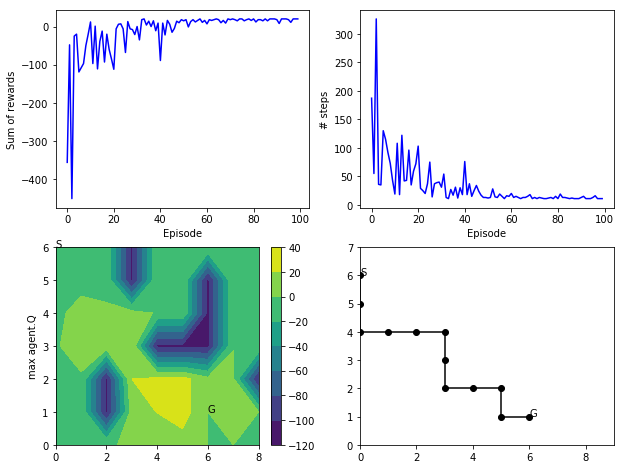

In [28]:
plot_train(agent, rtrace, steps, trace, start)

Goal state


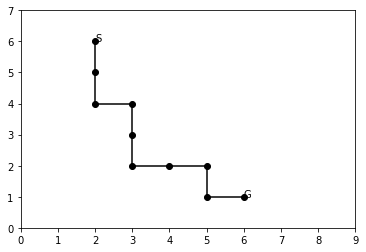

In [29]:
test_start = [0,2]
test_trace = agent.test(test_start)
plot_trace(agent, test_start, test_trace)

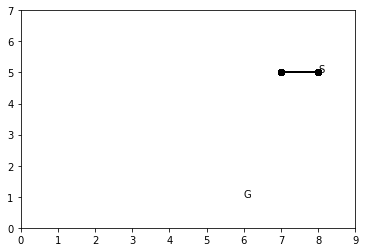

In [128]:
test_start = [1,8]
test_trace = agent.test(test_start)
plot_trace(agent, test_start, test_trace)

# Experimets - Maze

### 	Experimental to show the choice of parameters.

For Maze prblem, Let's experiment with different values for each of the parameters (gamma,  alpha , epsilon, maxiter, maxstep) and their impact is observerd.

** Expriment with Gamma: ** <br>
The  gama value represents discounting factor which means discounting the effect of change in Q value. 

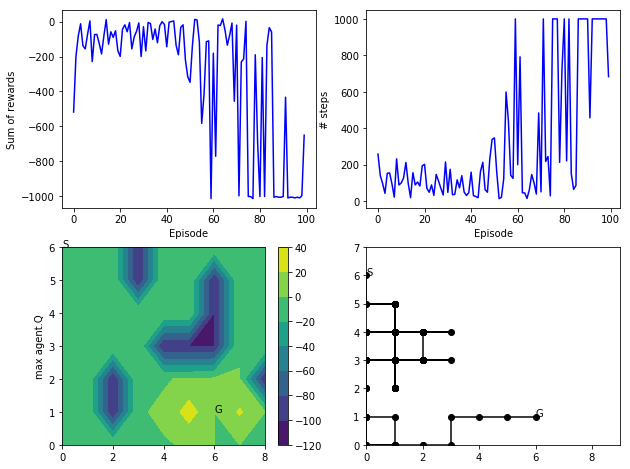

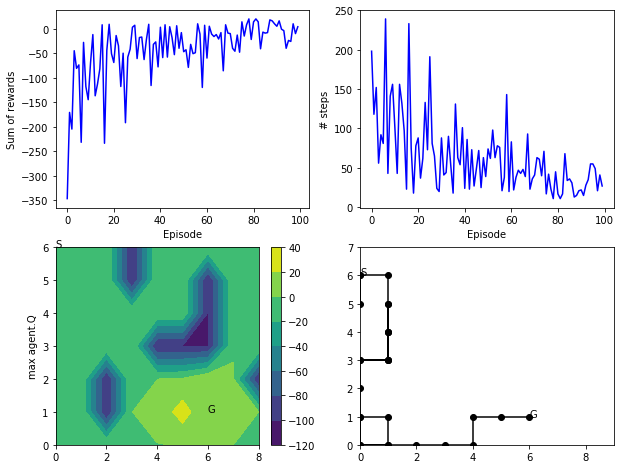

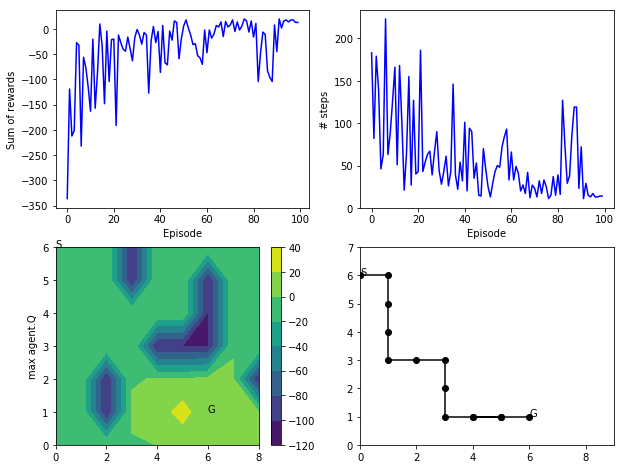

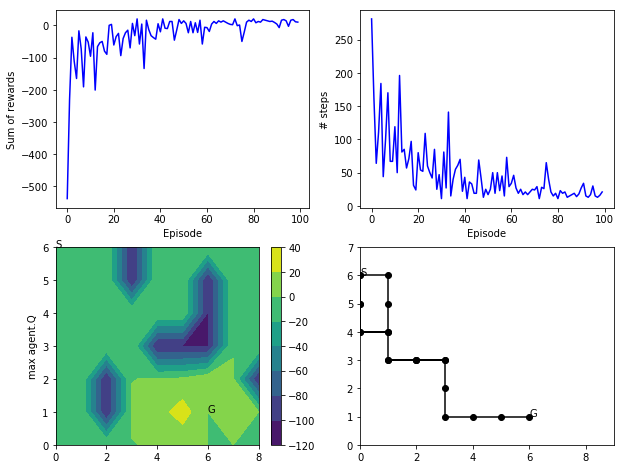

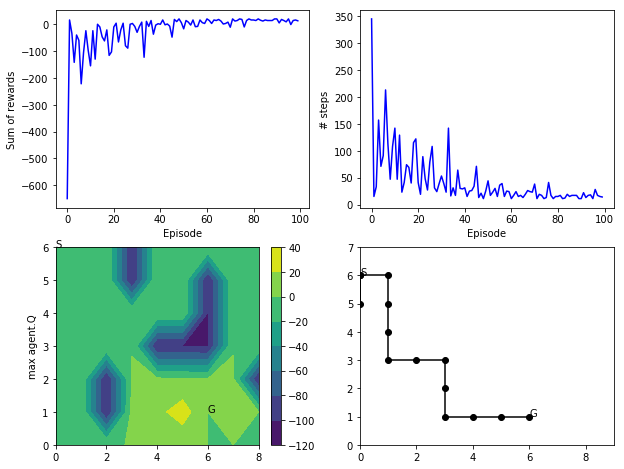

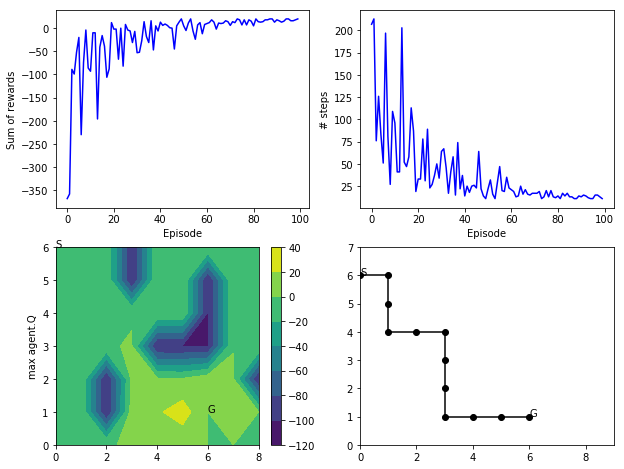

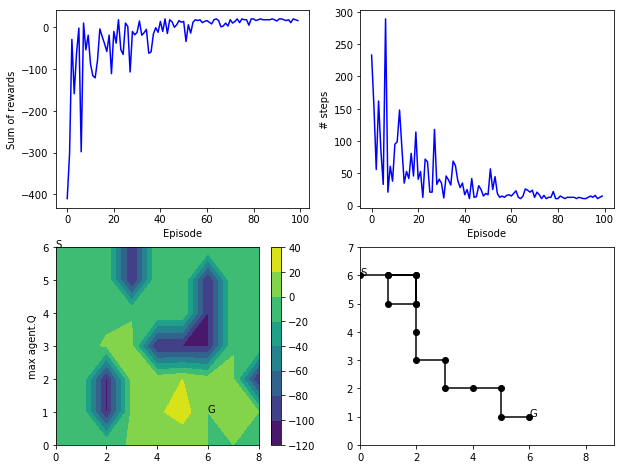

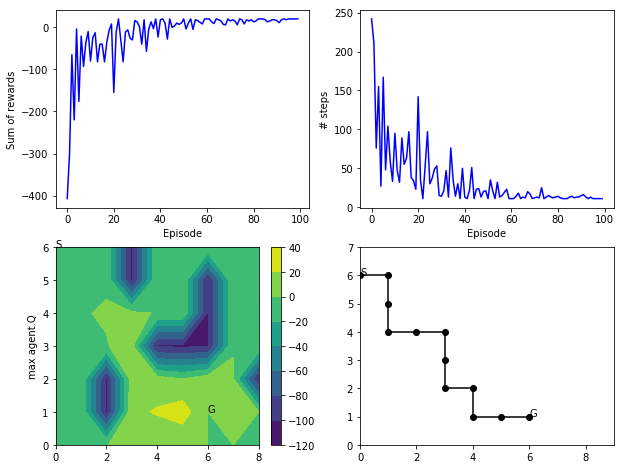

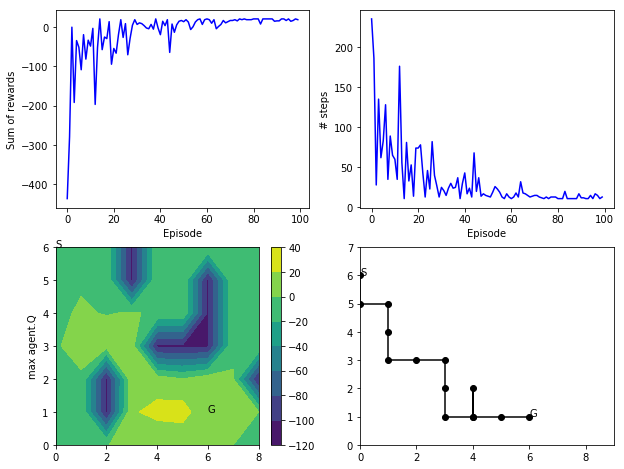

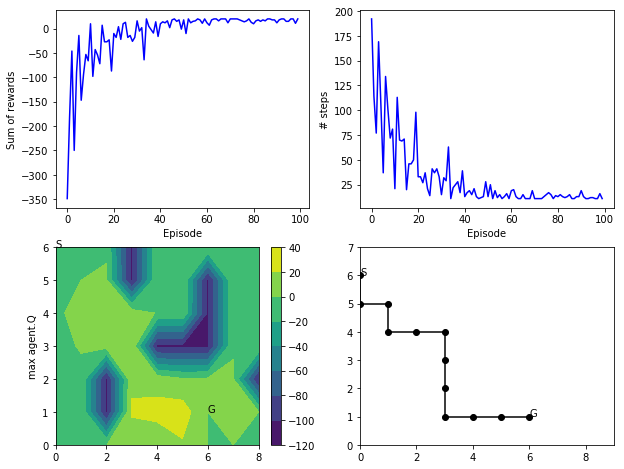

In [67]:
gammas = np.arange(0.1, 1, 0.1)
gammas = np.hstack((gammas, [0.99]))


for i, gama in enumerate(gammas):
    agent = RLAgent(env)
    start = [0,0]
    rtrace, steps, trace = agent.train(start, 
                                   gamma=gama, 
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=1000)


    plot_train(agent, rtrace, steps, trace, start)

As shown above, it is clear that the lesser values of  γ  does not reach to the convergence. The reason being, effect of difference in Q-values are to much discounted. The ideal values in my opinion for  γ should be between 0.6 to 0.9

** Expriment with Alpha: **

Lower alpha value may lead to slower optimization, on the other had large alpha value may overfit the Q-values. Here all possible values of alpha from 0.1 to 1 (with a step size of 0.1) are tested. The alpha value which is called Learning Rate, influences the convergence towards optimal Q-values.

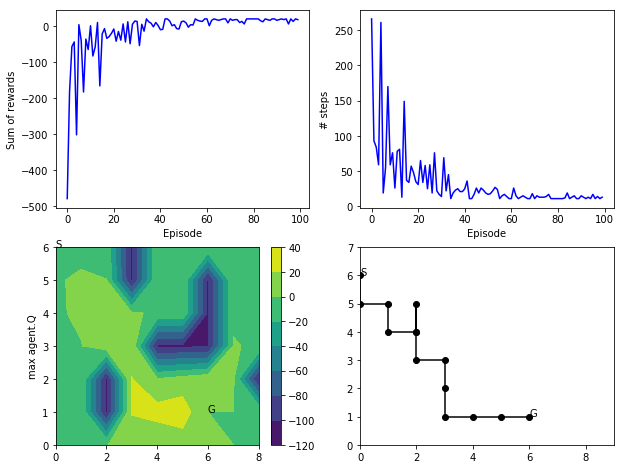

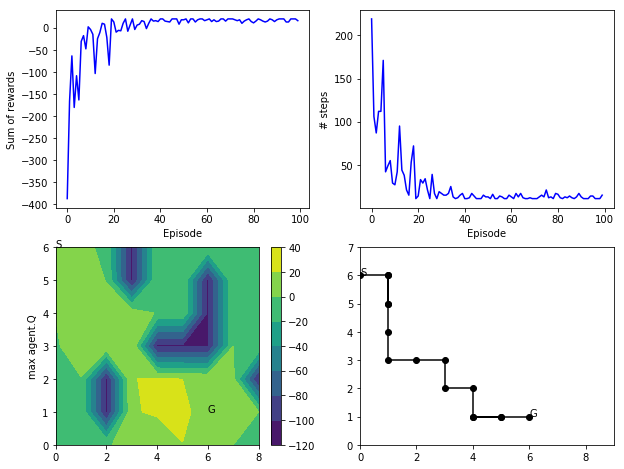

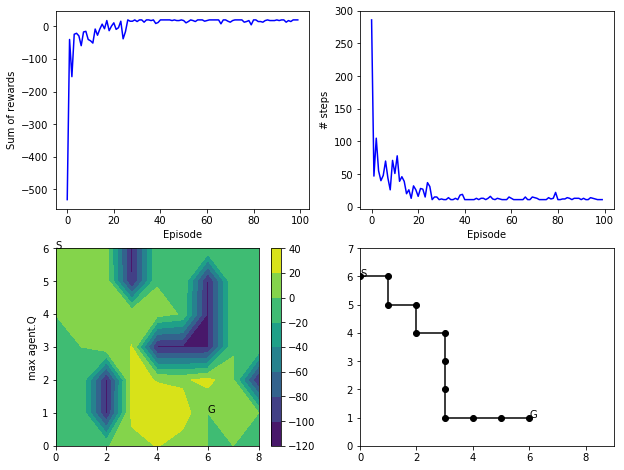

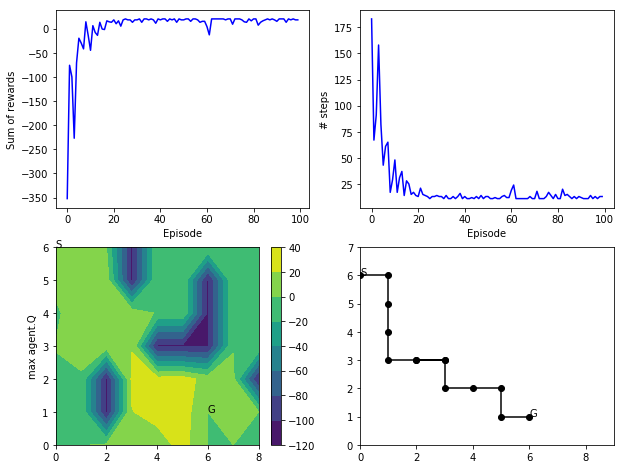

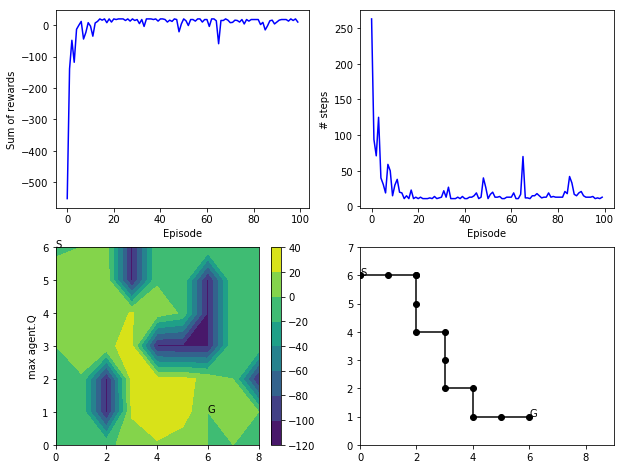

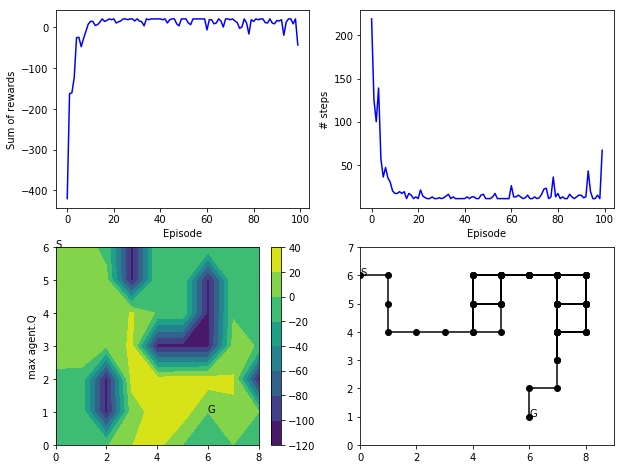

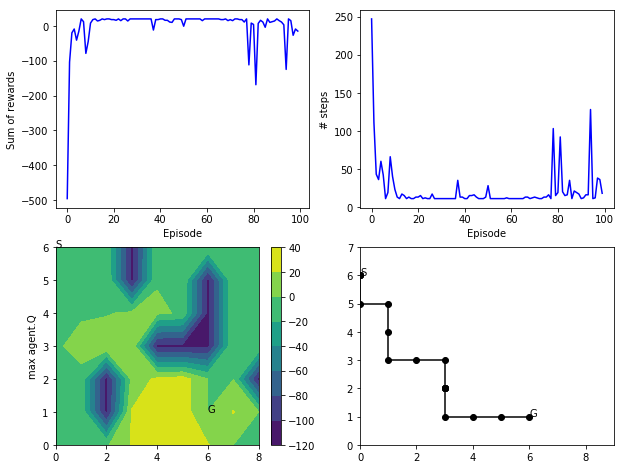

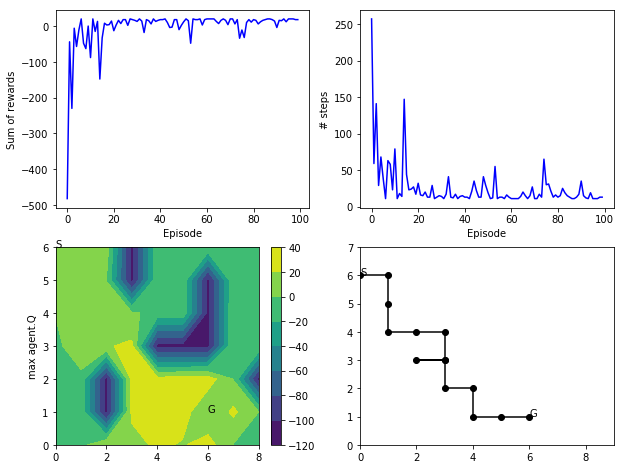

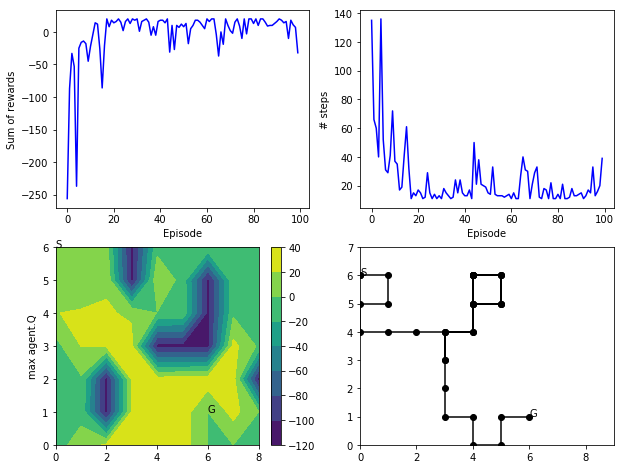

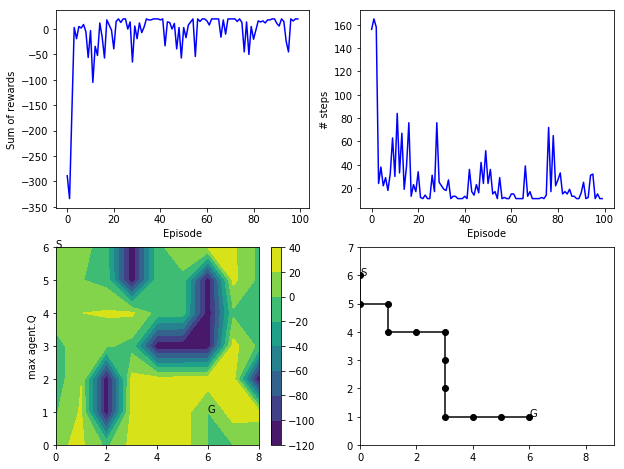

In [68]:
alphas = np.arange(0.1, 1, 0.1)


for i, alpha in enumerate(gammas):
    agent = RLAgent(env)
    start = [0,0]
    rtrace, steps, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=alpha, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=1000)


    plot_train(agent, rtrace, steps, trace, start)

As seen above, we can observe that the tail of the plot is less smoother for greater values of alpha. The opitimal value for alpha is 0.1 to 0.2 becoz even if we execute the experiment several times, the best observation most of the time will be from alpha = 0.1 and alpha = 0.2.  

** Expriment with Epsilon: **

By changing i.e increasing epsilon, we are making agent to traverse non-optimal areas as well. The results with various values of  ϵ  are seen below.

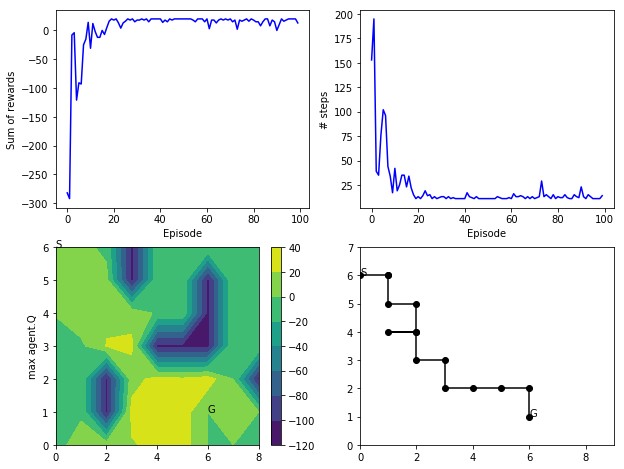

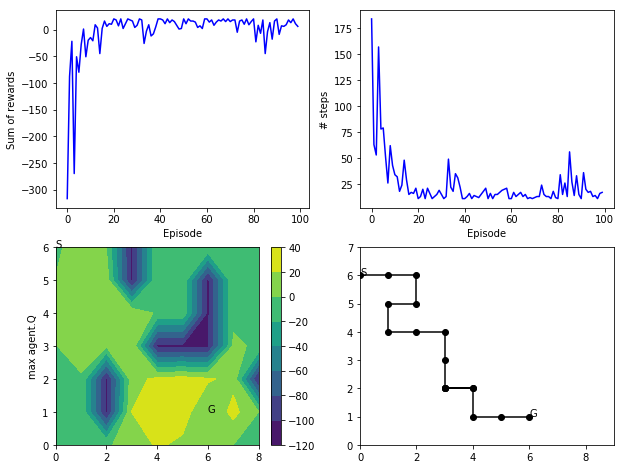

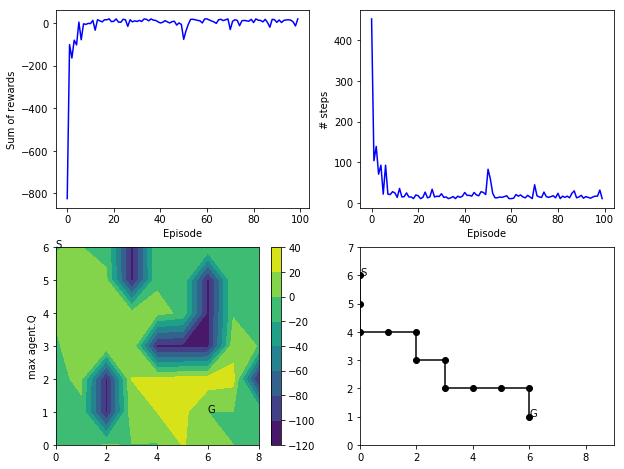

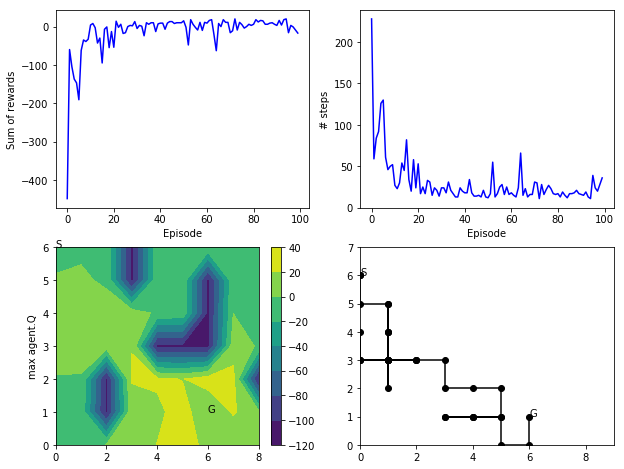

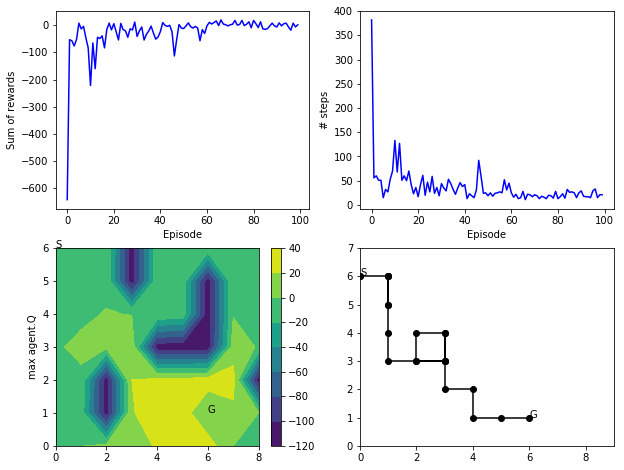

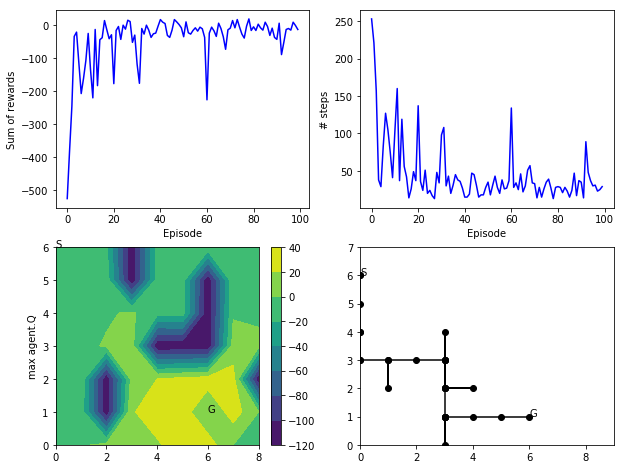

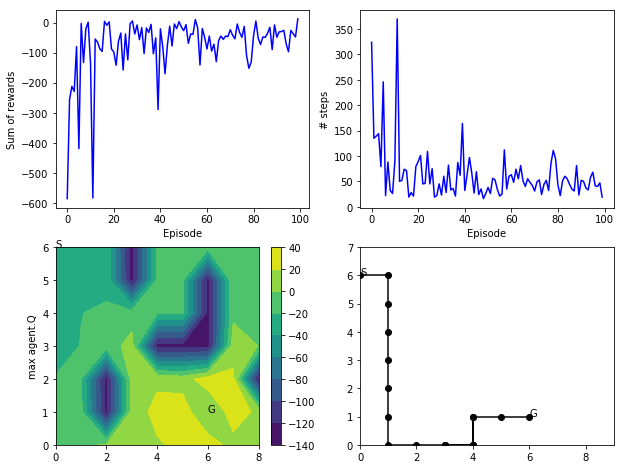

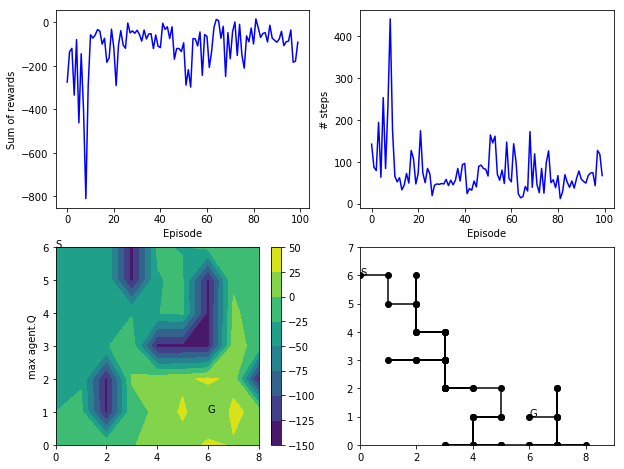

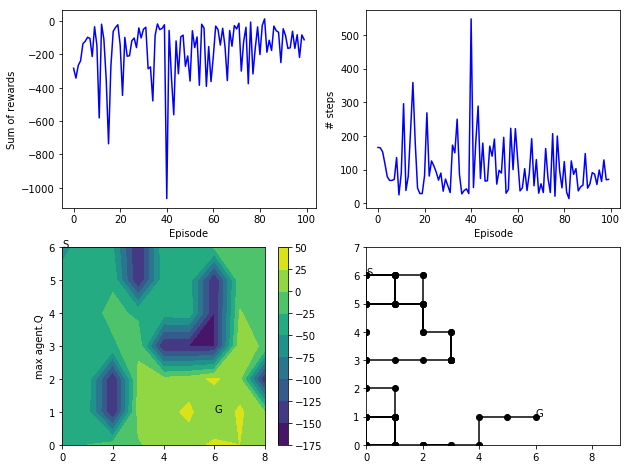

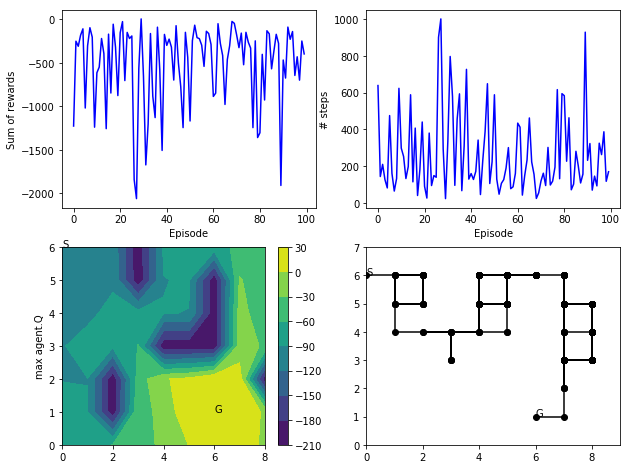

In [69]:
epsilons = np.arange(0.1, 1.1, 0.1)


for i, epsilon in enumerate(gammas):
    agent = RLAgent(env)
    start = [0,0]
    rtrace, steps, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.5, 
                                   epsilon=epsilon, 
                                   maxiter=100, 
                                   maxstep=1000)


    plot_train(agent, rtrace, steps, trace, start)

 ϵ  = 0.1 is the best comparative to other values. Higher values of  ϵ  gives more randomization. For  ϵ  = 1, always random states are selected. 

### Expriment to find Comination of optimal parameters
** reading and analysis of learning results and plots **|

As seen above experiments, Lets come up with an optimal set of parameters which optimizes the performance and efficiency of the model. 

** Combination set 1: **
    γ  = 0.9  α  = 0.5  ϵ  = 0.1 maxiter = 200 maxstep = 600

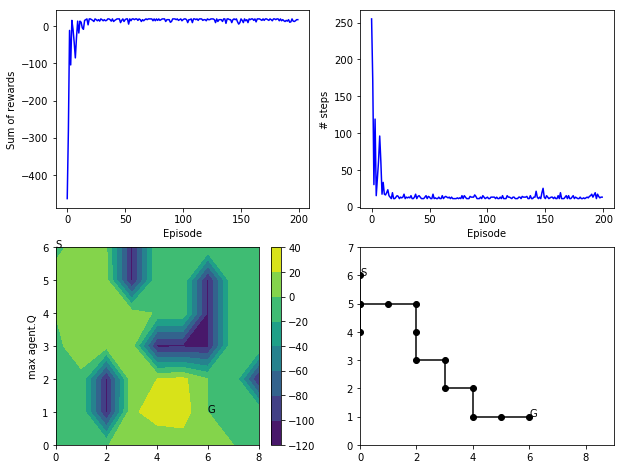

In [74]:
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.90, 
                                   alpha=0.5, 
                                   epsilon=0.1,
                                   maxiter=200, 
                                   maxstep=600)
plot_train(agent, rtrace, steps, trace, start)

In [ ]:
Combination set 2: γ  = 0.7  α  = 0.2  ϵ  = 0.1 maxiter = 70 maxstep = 300

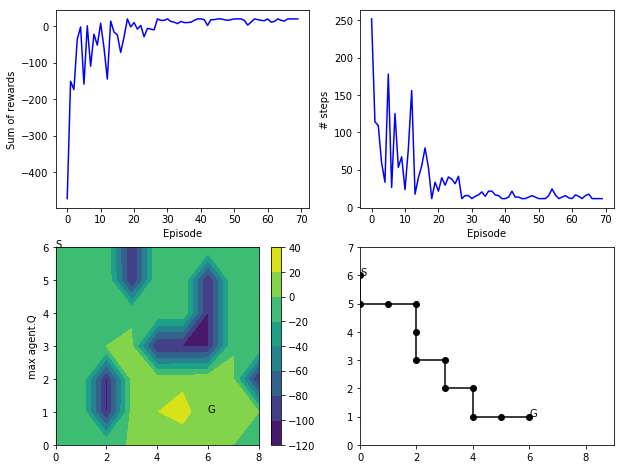

In [77]:
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.7, 
                                   alpha=0.2, 
                                   epsilon=0.1,
                                   maxiter=70, 
                                   maxstep=600)
plot_train(agent, rtrace, steps, trace, start)

# Expriment - Black Jack

Win = 369, Loss = 557, Draw = 74


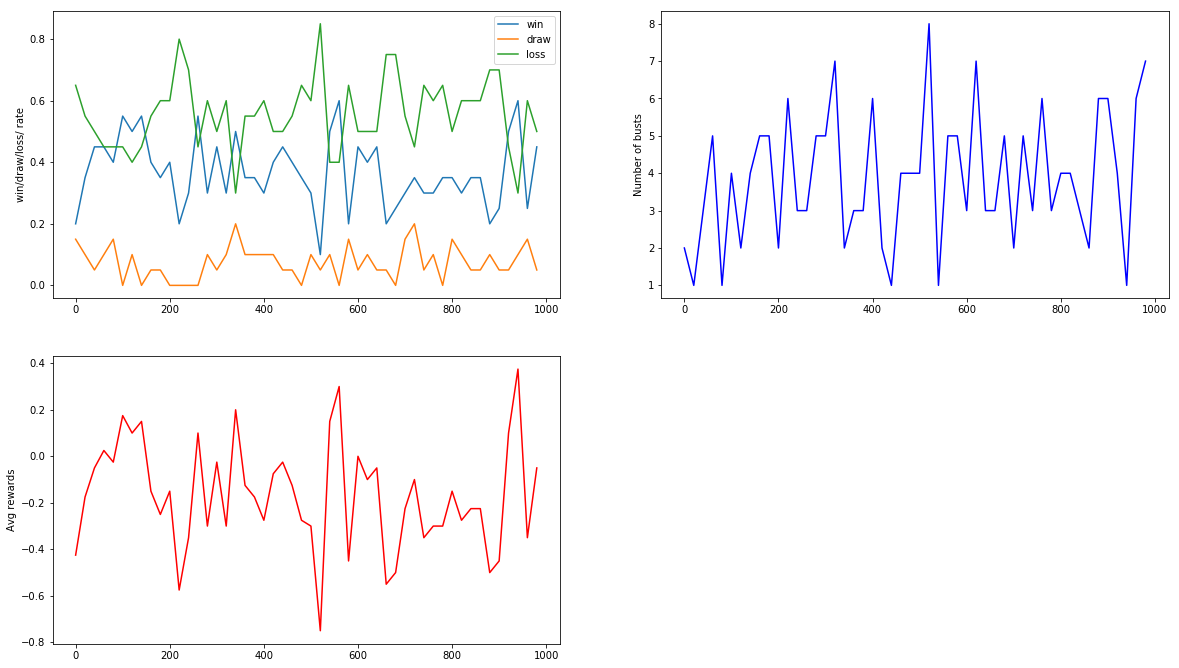

In [137]:
#utility function to plot black jack prob
def plot_blackjack(win, loss, draw, rewards, busts, maxgames):
    print('Win = ' + str(win) + ', Loss = ' + str(loss) + ', Draw = ' + str(draw))

    fig = plt.figure(figsize=(20,18))
    # number of busts and average rewards in interval
    interval = 1 if maxgames < 50 else maxgames // 50
    num_busts = []
    avg_rewards = []
    fraction_win = []
    fraction_draw = []
    fraction_loss = []

    i = 0
    #iterate over maxgems
    while i < maxgames:
        num_busts.append(sum(busts[i:interval + i]))
        avg_rewards.append(np.mean(rewards[i:interval + i]))
        fraction_win.append((rewards[i:interval + i].count(1) + rewards[i:interval + i].count(1.5)) / interval)
        fraction_draw.append((rewards[i:interval + i].count(0)) / interval)
        fraction_loss.append((rewards[i:interval + i].count(-1)) / interval)
        i += interval

    # Win/Draw/Loss rate
    ax = fig.add_subplot(321)
    plt.plot(np.arange(0, maxgames, maxgames // 50), fraction_win, label='win')
    plt.plot(np.arange(0, maxgames, maxgames // 50), fraction_draw, label='draw')
    plt.plot(np.arange(0, maxgames, maxgames // 50), fraction_loss, label='loss')
    plt.legend()
    plt.ylabel('win/draw/loss/ rate')

    # Number of busts
    ax = fig.add_subplot(322)
    plt.plot(np.arange(0, maxgames, maxgames // 50,), num_busts,color = 'b')
    plt.ylabel("Number of busts")

    # Average Rewards
    ax = fig.add_subplot(323)
    plt.plot(np.arange(0, maxgames, maxgames // 50,), avg_rewards,color = 'r')
    plt.ylabel("Avg rewards")
    
    plt.show()
    
env = BlackjackEnv(natural=True)
agent = RLA_BlackJack(env)
maxgames = 1000
win, loss, draw, rewards, busts = agent.train(gamma=0.99, 
                                               alpha=0.1, 
                                               epsilon=0.1, 
                                               maxgames=maxgames)
plot_blackjack(win, loss, draw, rewards, busts, maxgames)

In [138]:
ngames = 10
win = 0
loss = 0
draw = 0

for i in range(ngames):    
    r, trace, actions = agent.test()
    if r > 0:
        outcome = 'Won'
        win += 1
    elif r == 0:
        outcome = 'Draw'
        draw += 1
    else:
        outcome = 'Lost'
        loss += 1

    output = [['Hand', 'Ace', 'Dealer', 'Action']]
    for j in range(len(actions)):
        output.append([trace[j][0], ('Yes' if trace[j][2] else 'No'), trace[j][1], \
            ('Stay' if actions[j] == 0 else 'Hit')])
    
    if actions[j] == 1:
        output.append([trace[j + 1][0], ('Yes' if trace[j + 1][2] else 'No'), trace[j + 1][1], \
            ''])
    print(output)

print('Win = ' + str(win) + ', Loss = ' + str(loss) + ', Draw = ' + str(draw))

[['Hand', 'Ace', 'Dealer', 'Action'], [8, 'No', 10, 'Hit'], [16, 'No', 10, 'Hit'], [24, 'No', 10, '']]
[['Hand', 'Ace', 'Dealer', 'Action'], [15, 'No', 10, 'Hit'], [16, 'No', 10, 'Hit'], [23, 'No', 10, '']]
[['Hand', 'Ace', 'Dealer', 'Action'], [20, 'No', 7, 'Stay']]
[['Hand', 'Ace', 'Dealer', 'Action'], [15, 'Yes', 4, 'Hit'], [17, 'Yes', 4, 'Stay']]
[['Hand', 'Ace', 'Dealer', 'Action'], [14, 'No', 6, 'Stay']]
[['Hand', 'Ace', 'Dealer', 'Action'], [7, 'No', 1, 'Hit'], [12, 'No', 1, 'Hit'], [13, 'No', 1, 'Hit'], [15, 'No', 1, 'Hit'], [17, 'No', 1, 'Hit'], [25, 'No', 1, '']]
[['Hand', 'Ace', 'Dealer', 'Action'], [16, 'No', 6, 'Hit'], [22, 'No', 6, '']]
[['Hand', 'Ace', 'Dealer', 'Action'], [19, 'No', 10, 'Stay']]
[['Hand', 'Ace', 'Dealer', 'Action'], [15, 'No', 8, 'Hit'], [20, 'No', 8, 'Stay']]
[['Hand', 'Ace', 'Dealer', 'Action'], [12, 'No', 8, 'Stay']]
Win = 1, Loss = 8, Draw = 1


### Experiments - Parameters - Black Jack 

Let's ecperiment with different parameters for Black Jack problem. The parameters considered are alpha, gamma, epsilon, maxiter, maxstep. In each experiment let's oberver its significance.

** Gamma Values **

The  gama value , represents discounting factor, which means discounting the effect of change in Q value. Because of that, the model gives bad results.

Win = 380, Loss = 542, Draw = 78


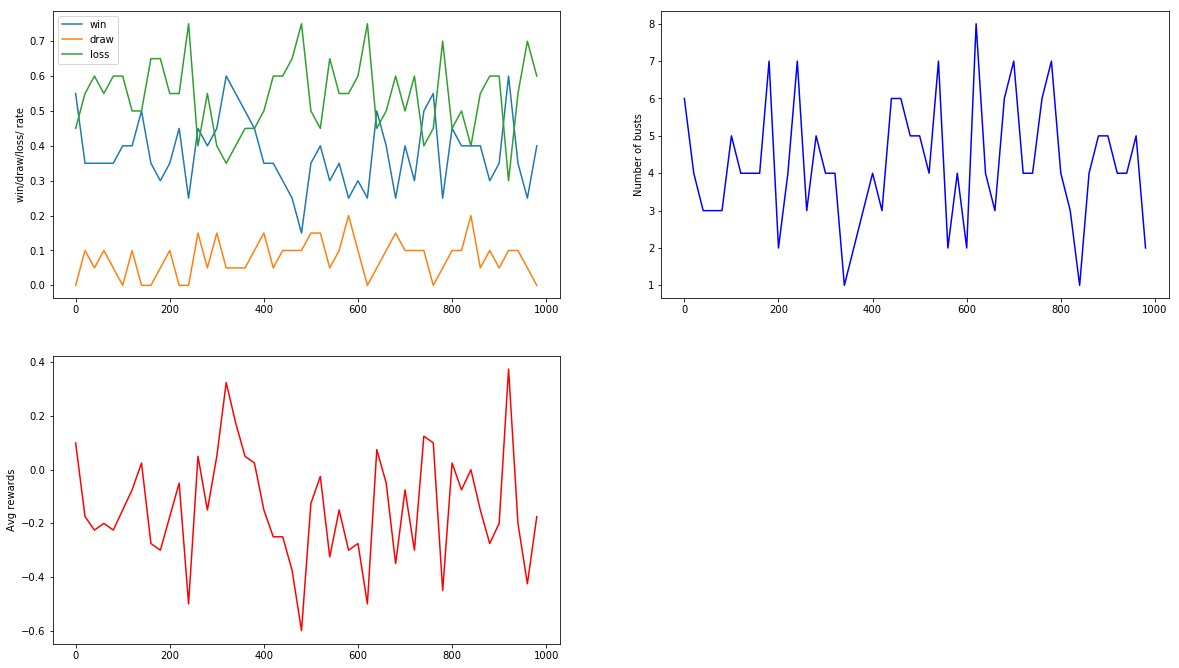

Win = 405, Loss = 507, Draw = 88


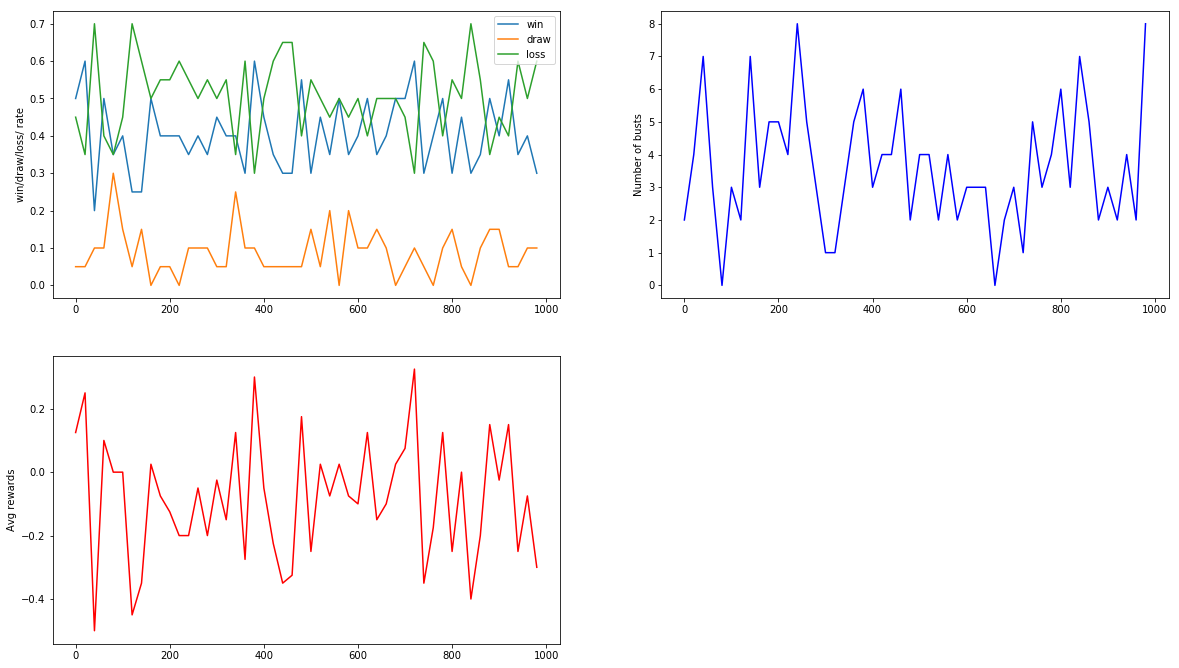

Win = 409, Loss = 505, Draw = 86


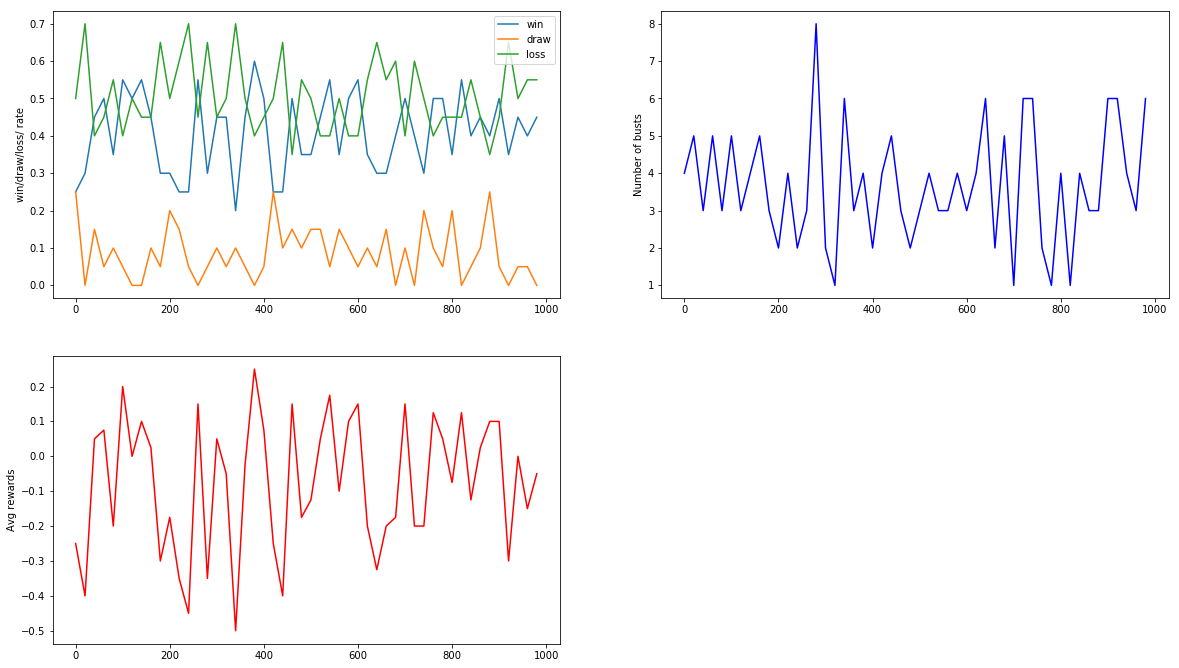

Win = 406, Loss = 502, Draw = 92


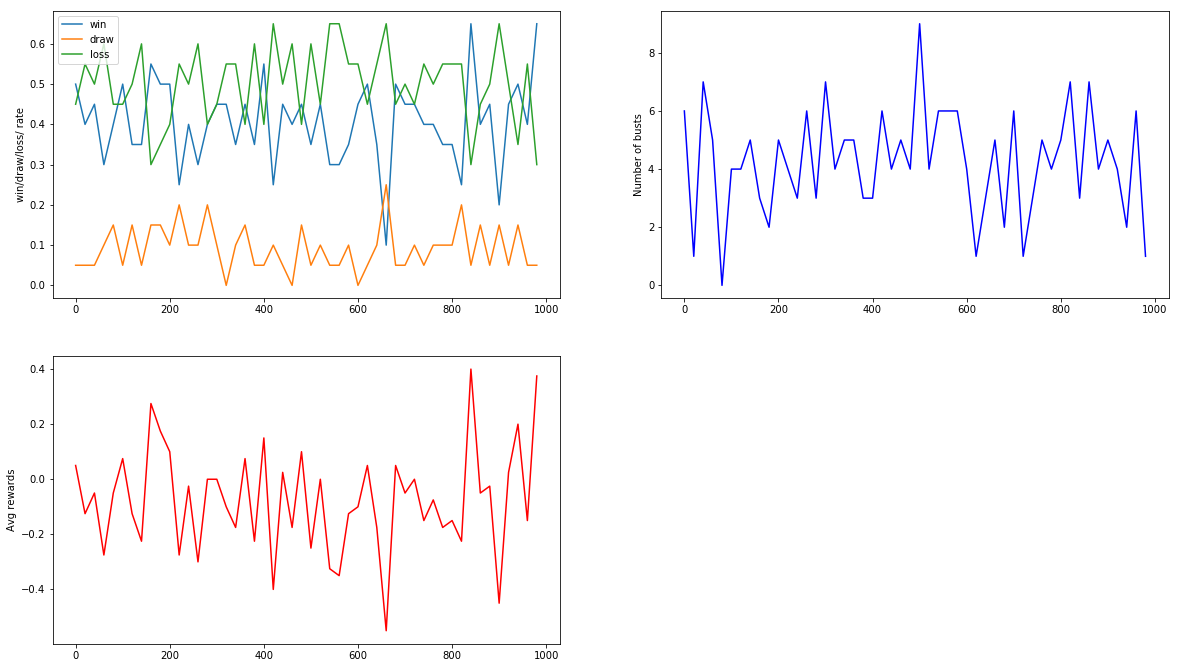

Win = 391, Loss = 508, Draw = 101


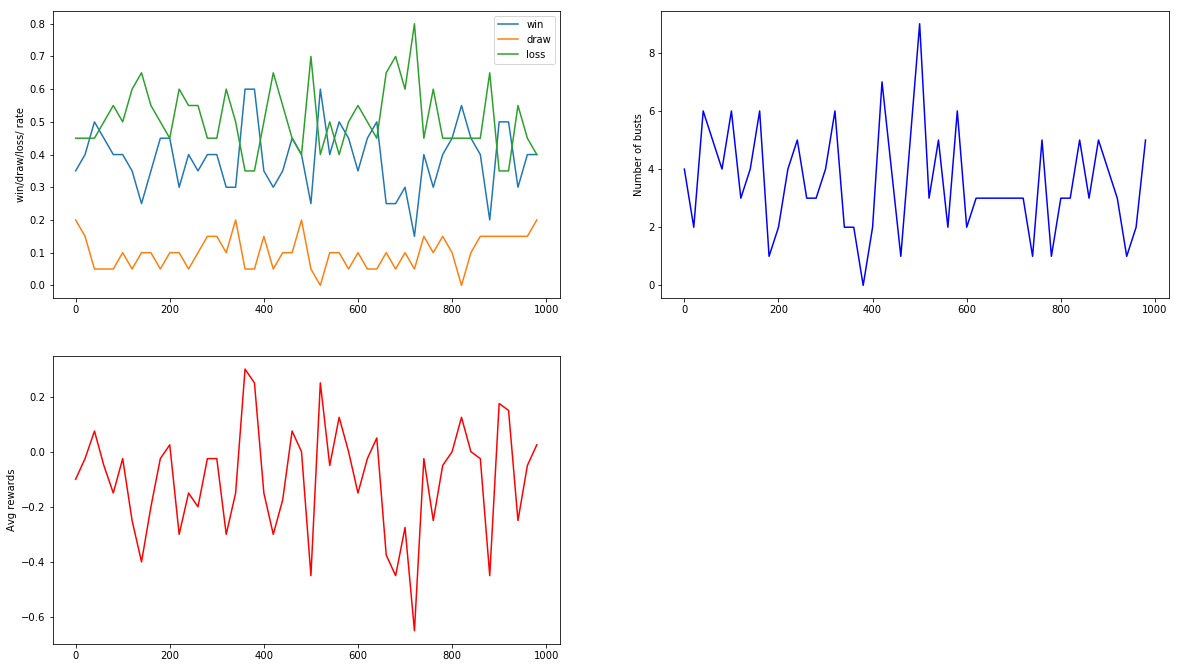

Win = 423, Loss = 511, Draw = 66


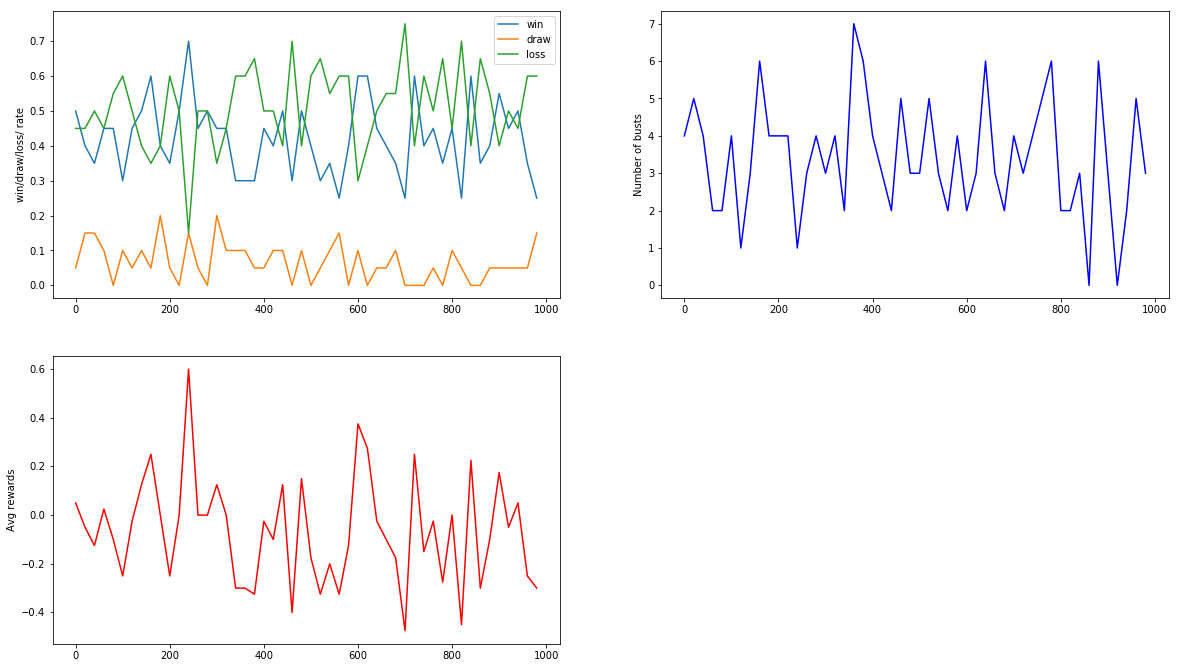

Win = 418, Loss = 493, Draw = 89


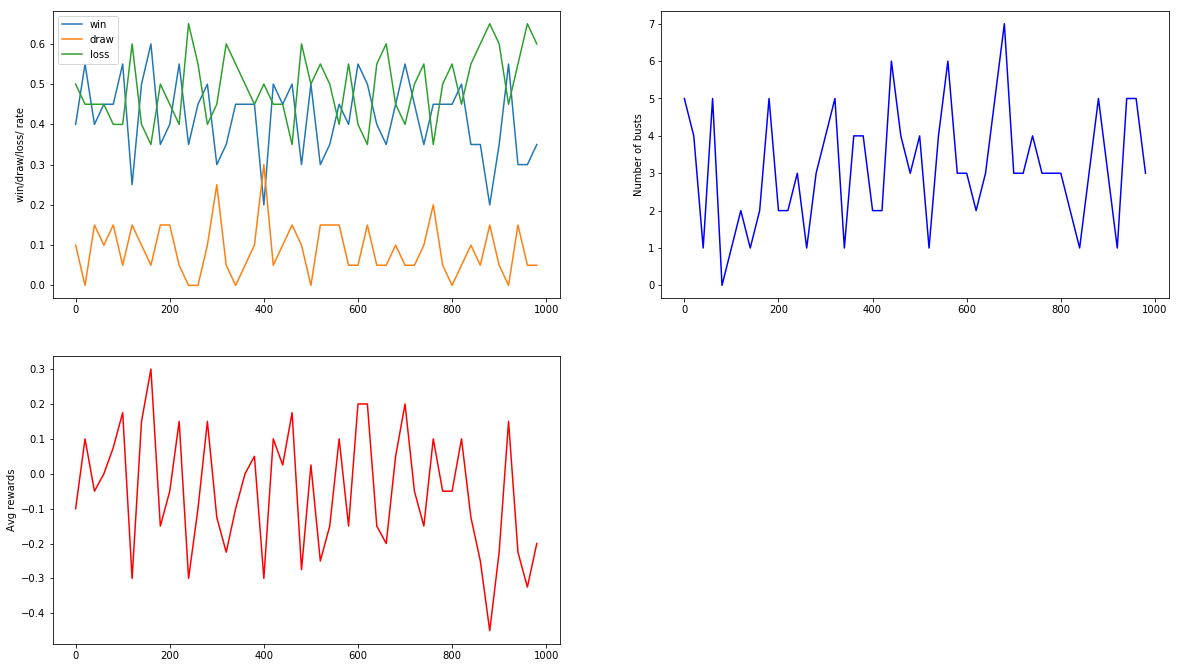

Win = 406, Loss = 493, Draw = 101


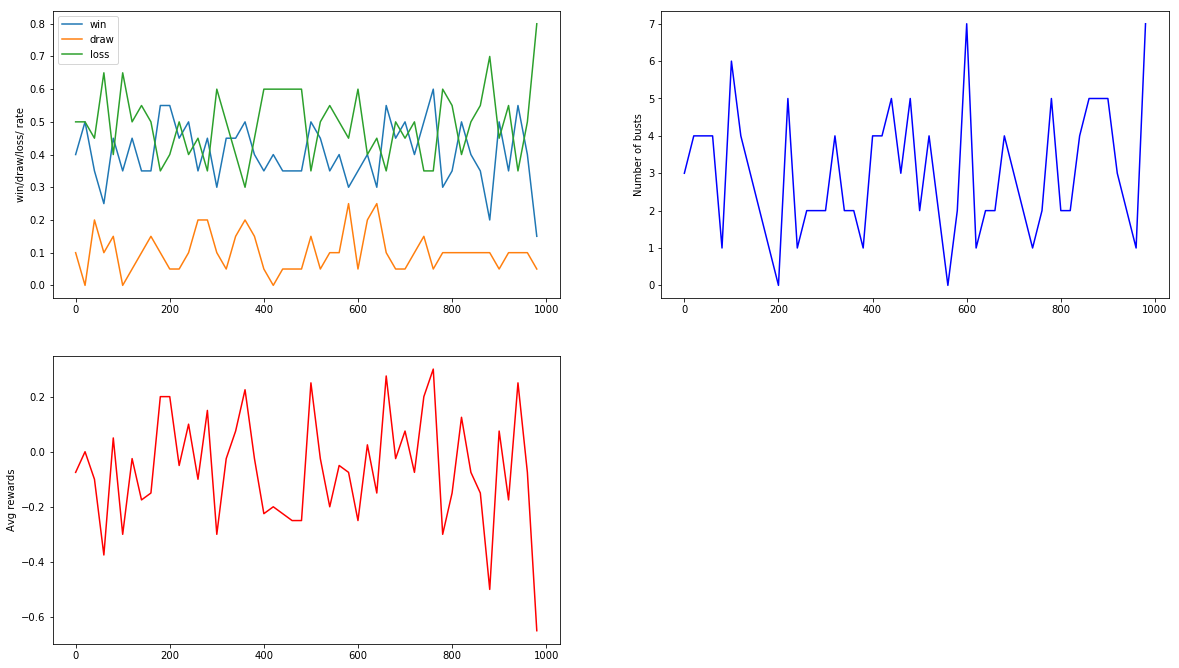

Win = 393, Loss = 520, Draw = 87


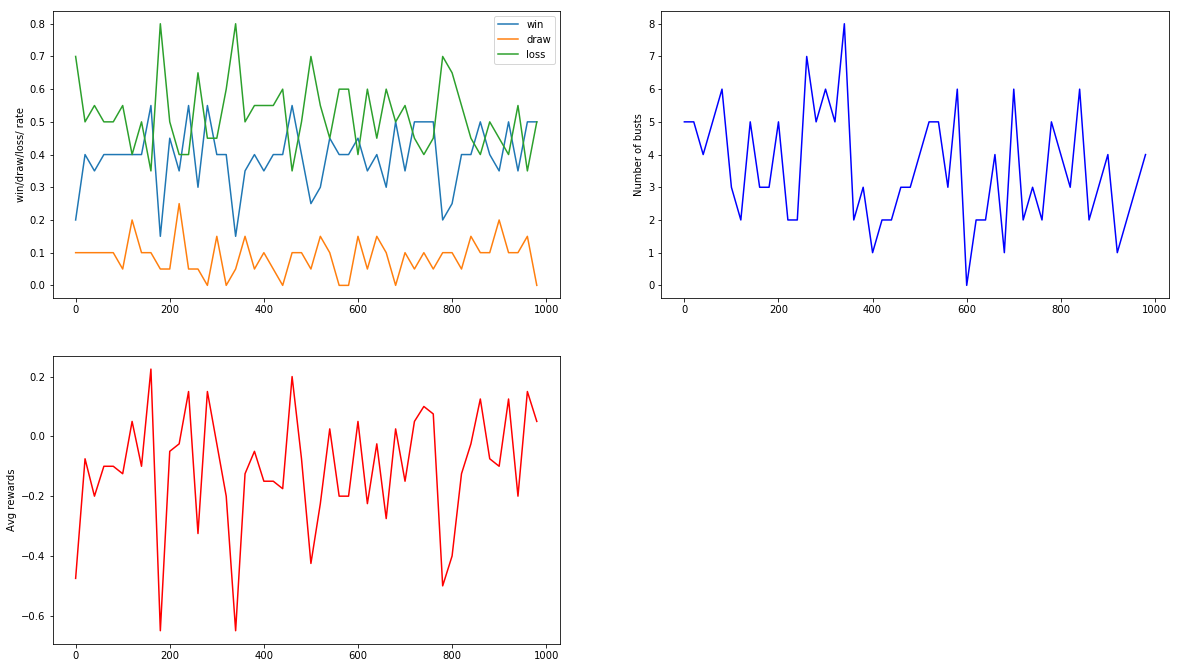

Win = 407, Loss = 518, Draw = 75


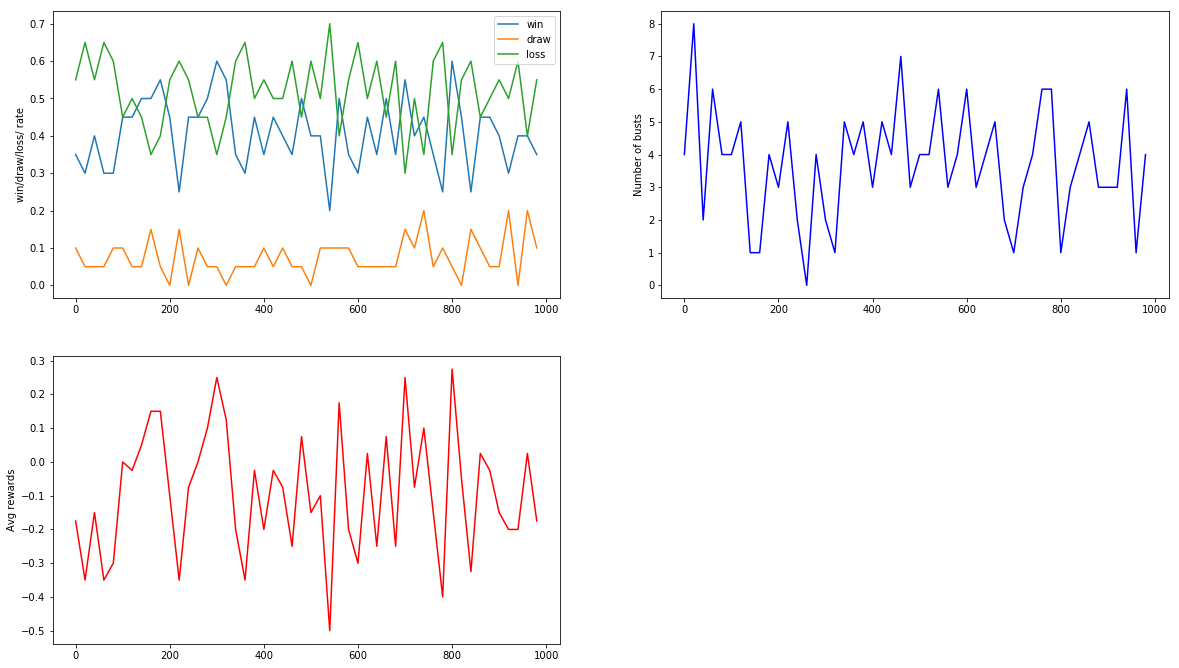

In [139]:
gammas = np.arange(0.1, 1, 0.1)
gammas = np.hstack((gammas, [0.99]))

#fig = plt.figure(figsize=(60,18))
#col = 5
row = math.ceil(len(gammas) / col)

for j, gamma in enumerate(gammas):
    maxgames = 1000
    win, loss, draw, rewards, busts = agent.train(gamma=gamma, 
                                                   alpha=0.1, 
                                                   epsilon=0.1, 
                                                   maxgames=maxgames)
    
    plot_blackjack(win, loss, draw, rewards, busts, maxgames)
    


Like the previous experiment, the lower values of  γγ  are comparatively bad.

** Experiment with Alpha values  **

Lower alpha value may lead to slower optimization, on the other had large alpha value may overfit the Q-values. Here all possible values of alpha from 0.1 to 1 (with a step size of 0.1) are tested. The alpha value which is called Learning Rate, influences the convergence towards optimal Q-values.

Win = 411, Loss = 513, Draw = 76


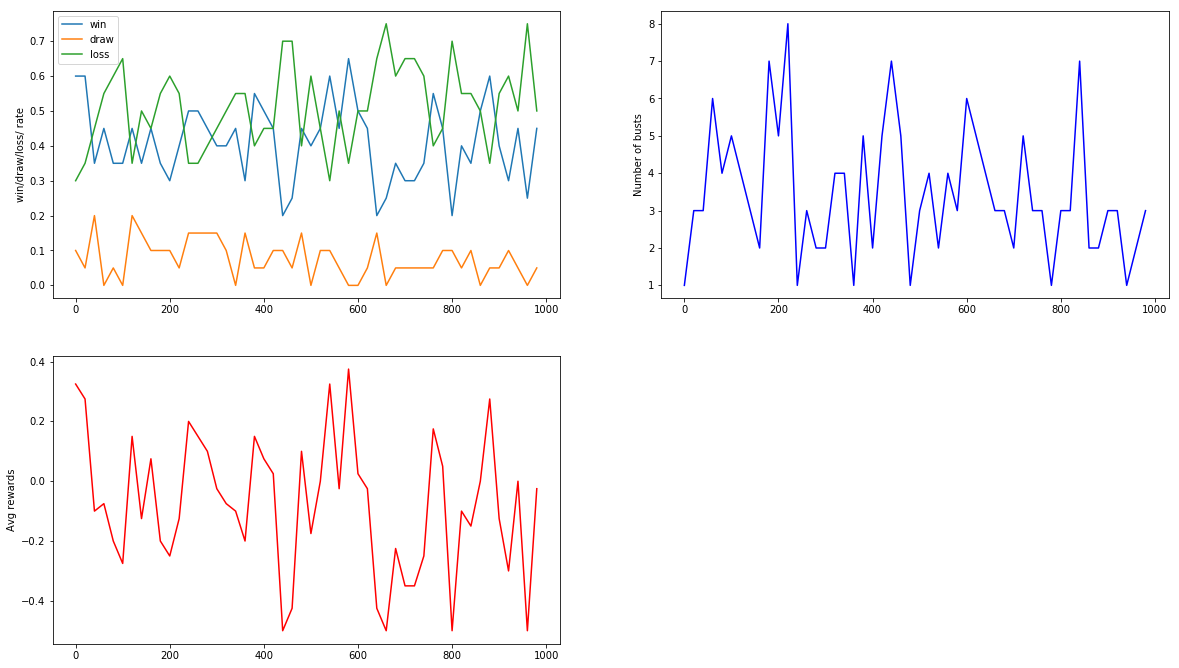

Win = 379, Loss = 534, Draw = 87


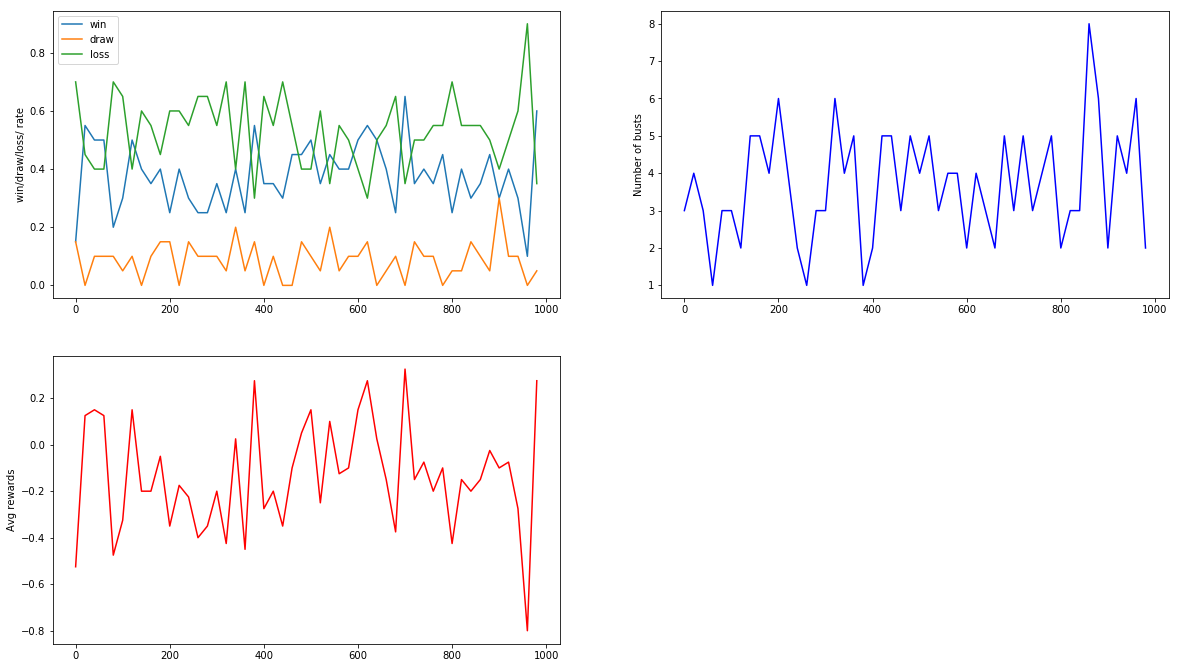

Win = 427, Loss = 479, Draw = 94


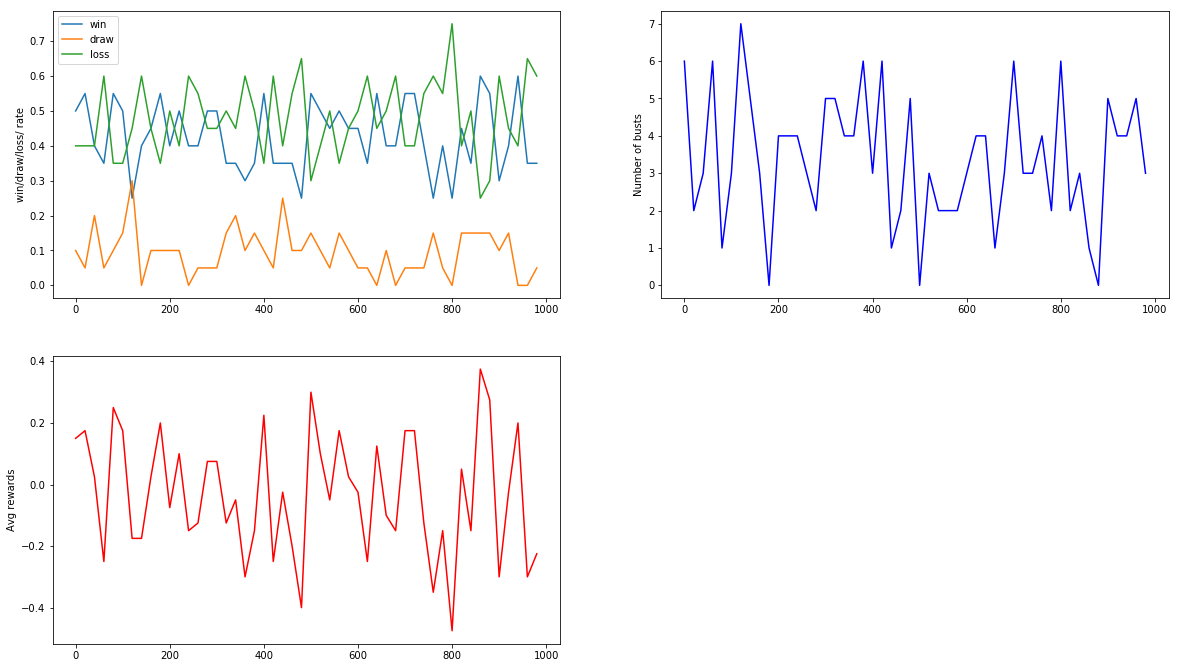

Win = 367, Loss = 538, Draw = 95


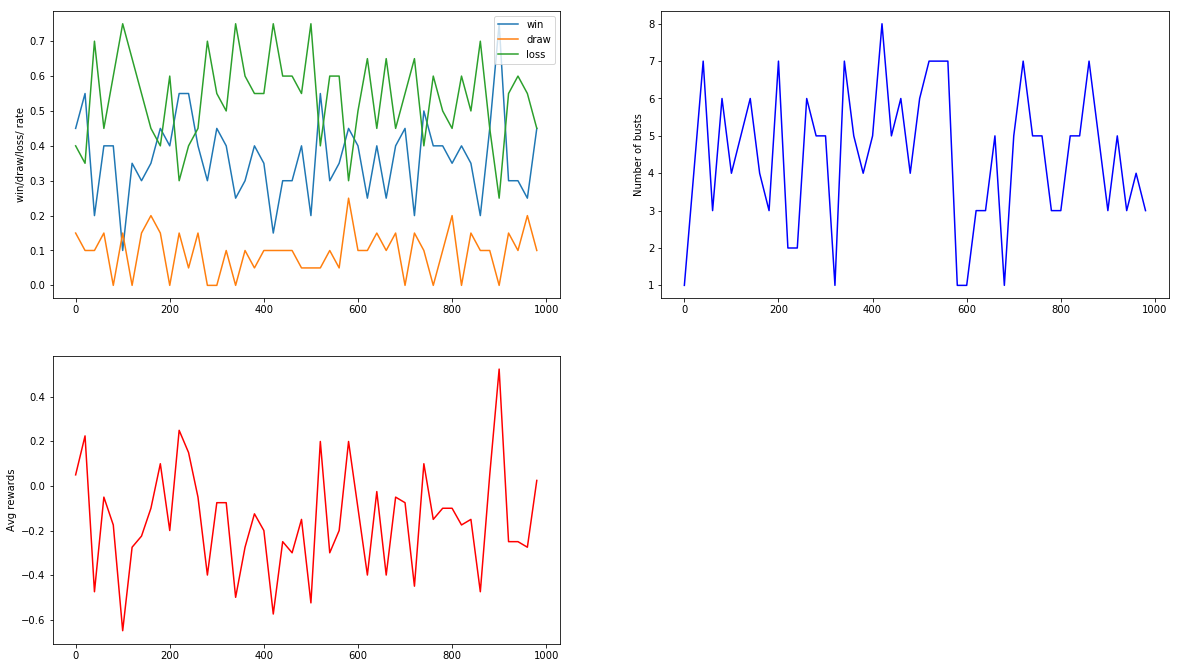

Win = 405, Loss = 516, Draw = 79


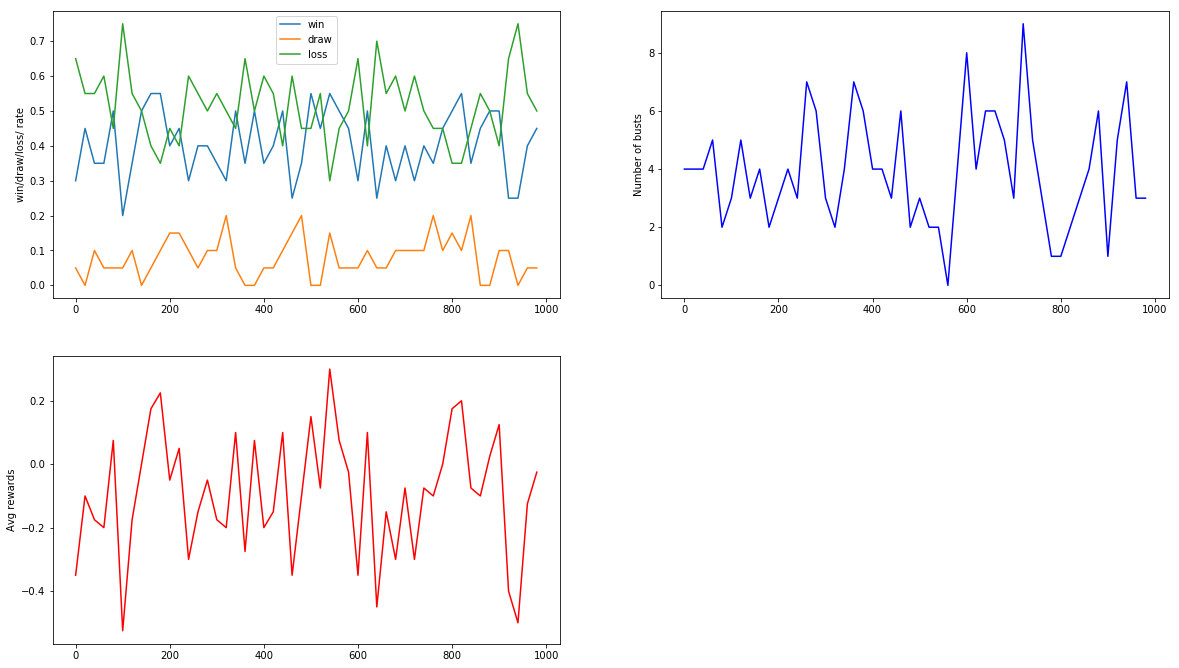

Win = 389, Loss = 535, Draw = 76


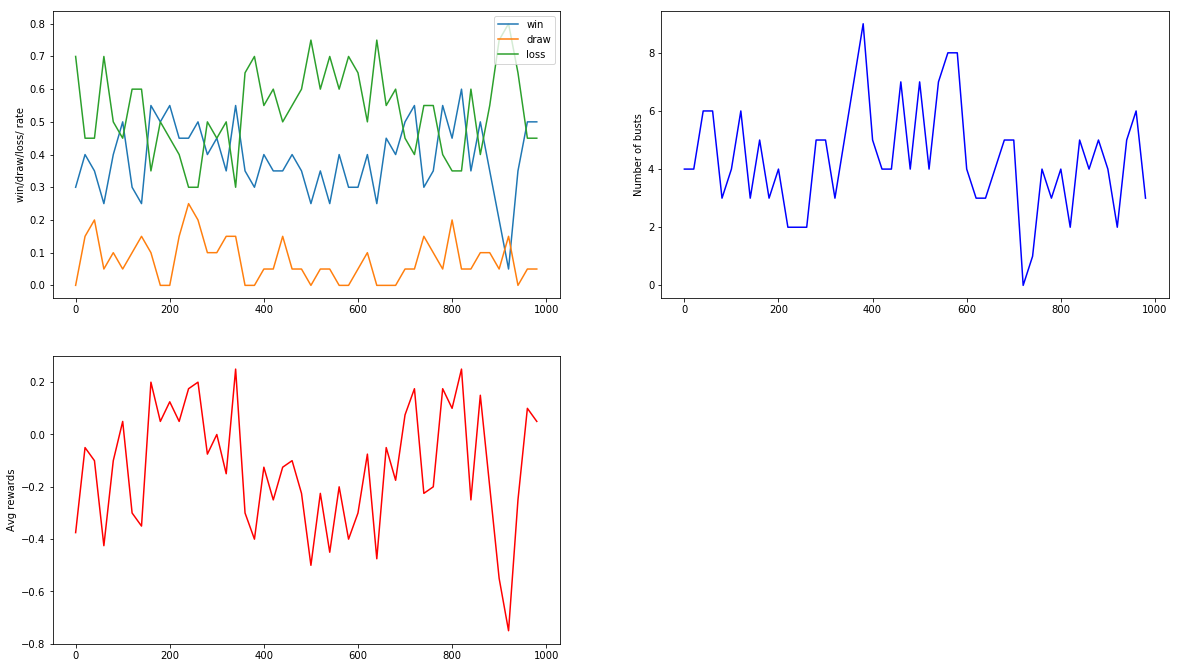

Win = 382, Loss = 544, Draw = 74


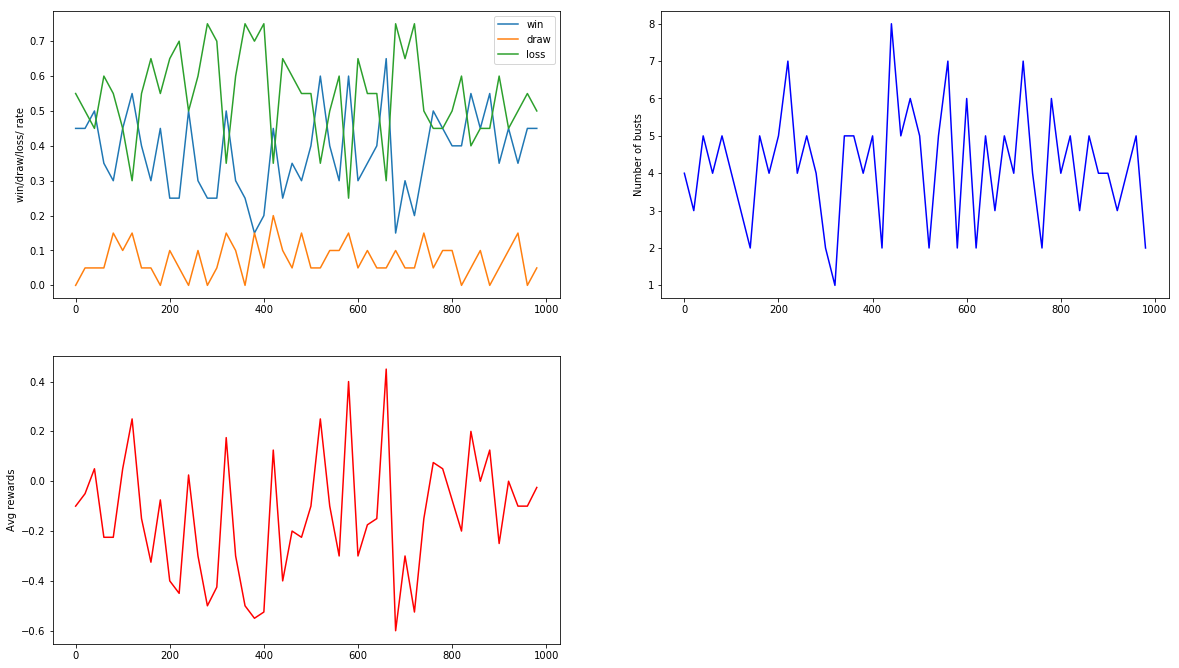

Win = 415, Loss = 496, Draw = 89


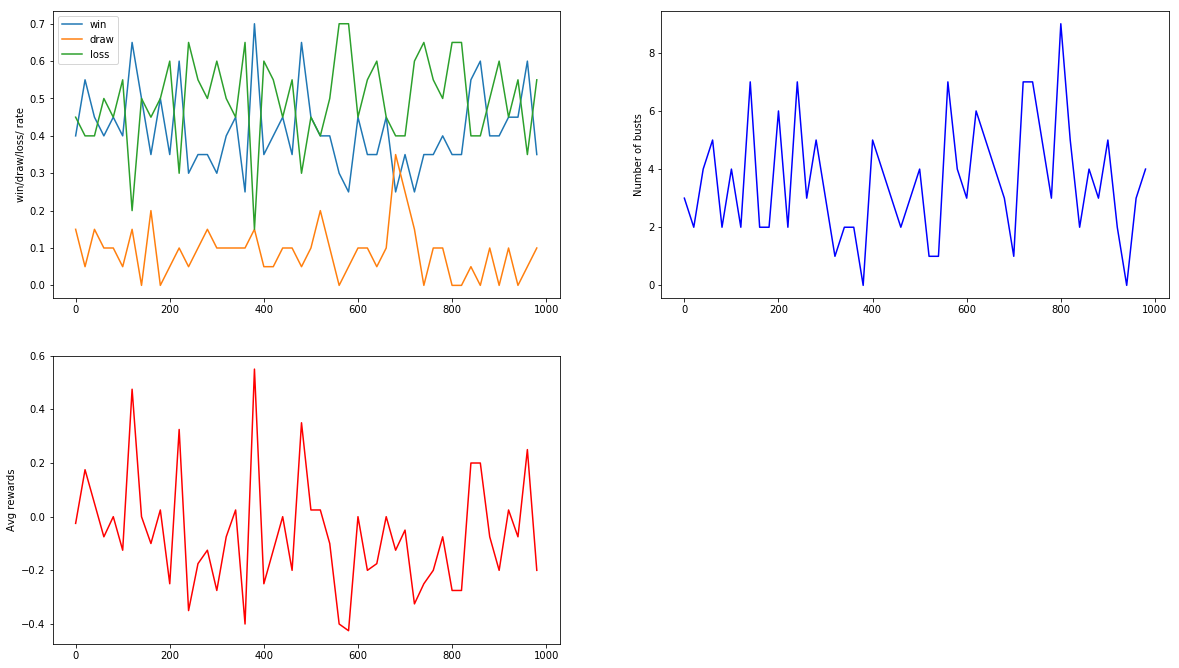

Win = 346, Loss = 568, Draw = 86


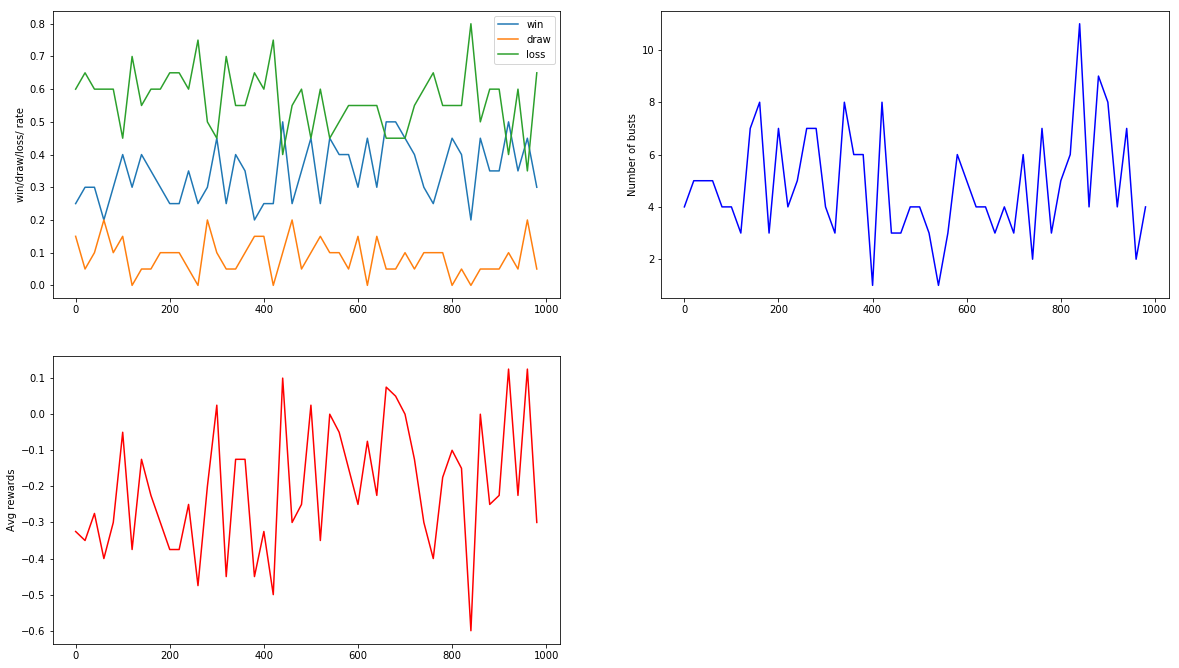

Win = 405, Loss = 528, Draw = 67


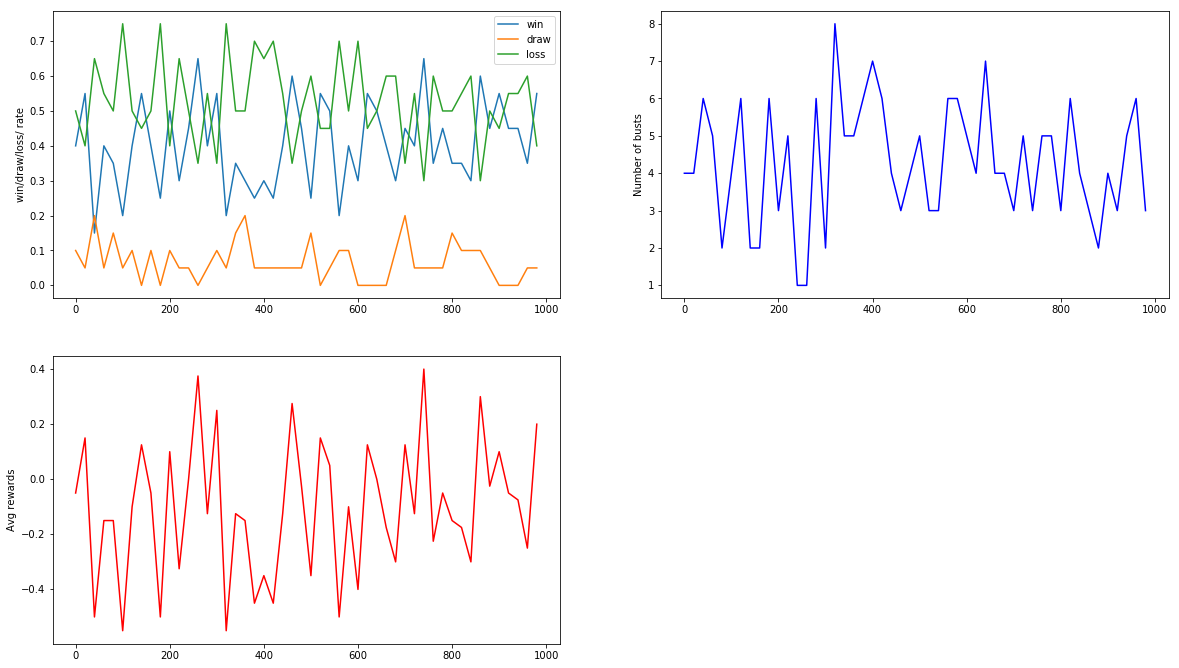

In [140]:
alphas = np.arange(0.1, 1, 0.1)



#fig = plt.figure(figsize=(60,18))
#col = 5
row = math.ceil(len(gammas) / col)

for j, alpha in enumerate(gammas):
    maxgames = 1000
    win, loss, draw, rewards, busts = agent.train(gamma=0.99, 
                                                   alpha=alpha, 
                                                   epsilon=0.1, 
                                                   maxgames=maxgames)
    
    plot_blackjack(win, loss, draw, rewards, busts, maxgames)
    


As seen above, we can observe that the good values of  αα  are less than 0.6, while others are very bad. On an average number of attempts of this experiment, 0.5 works better.

** Experiment with Epsilon Value **

Win = 388, Loss = 533, Draw = 79


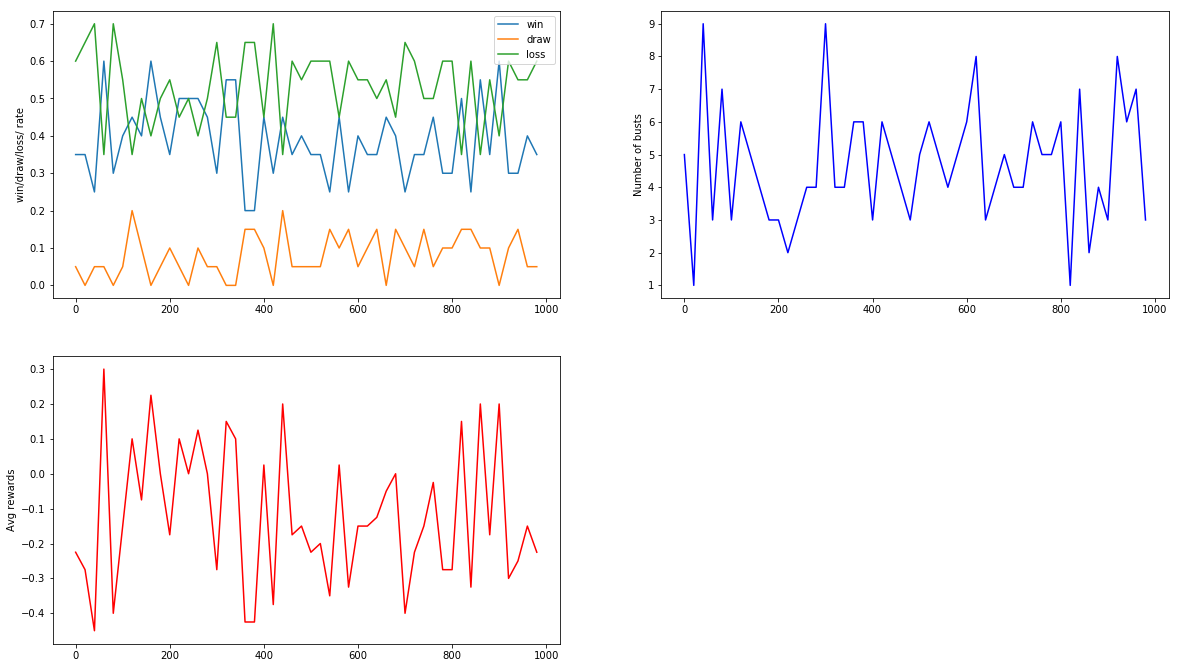

Win = 372, Loss = 557, Draw = 71


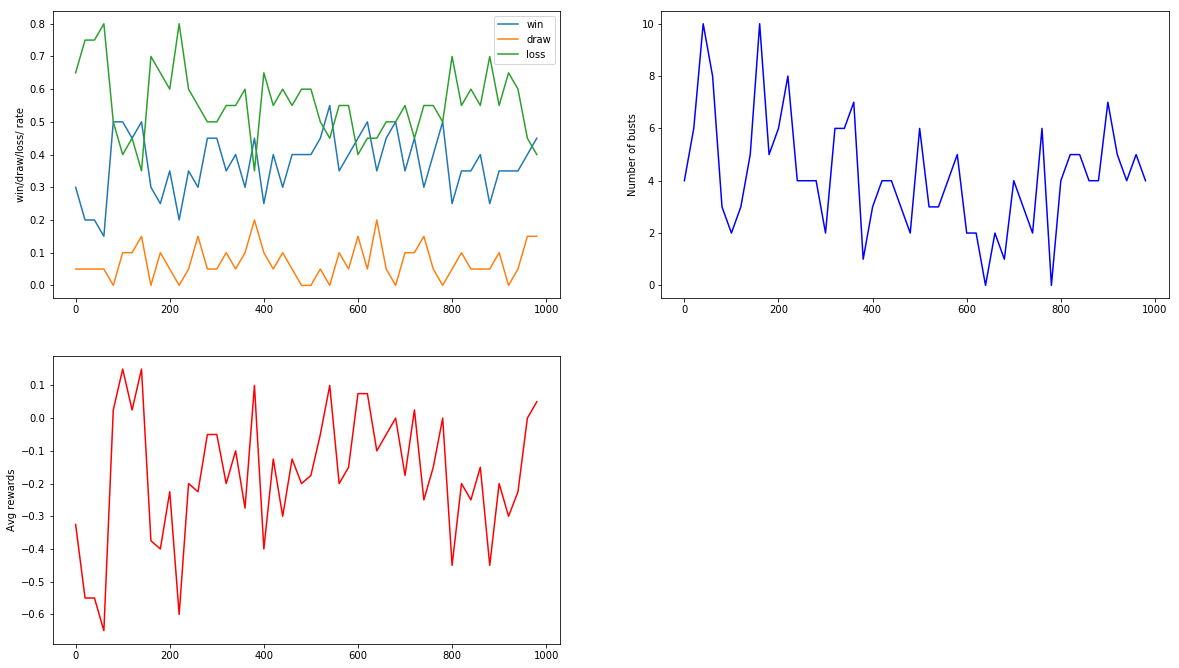

Win = 328, Loss = 589, Draw = 83


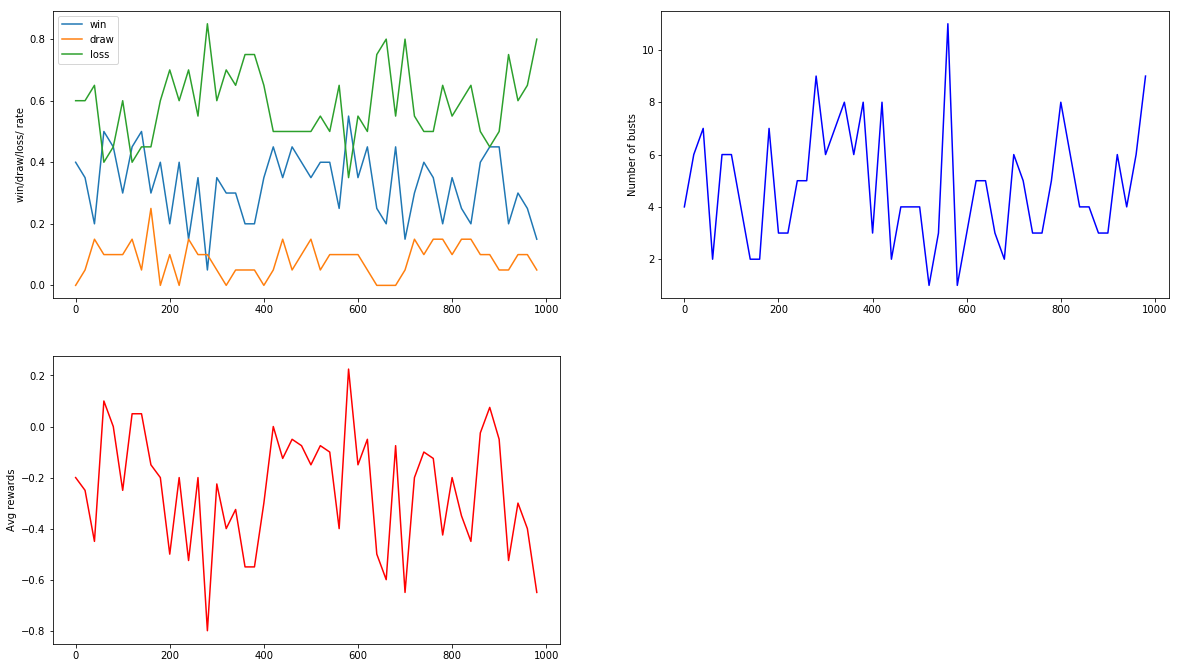

Win = 348, Loss = 581, Draw = 71


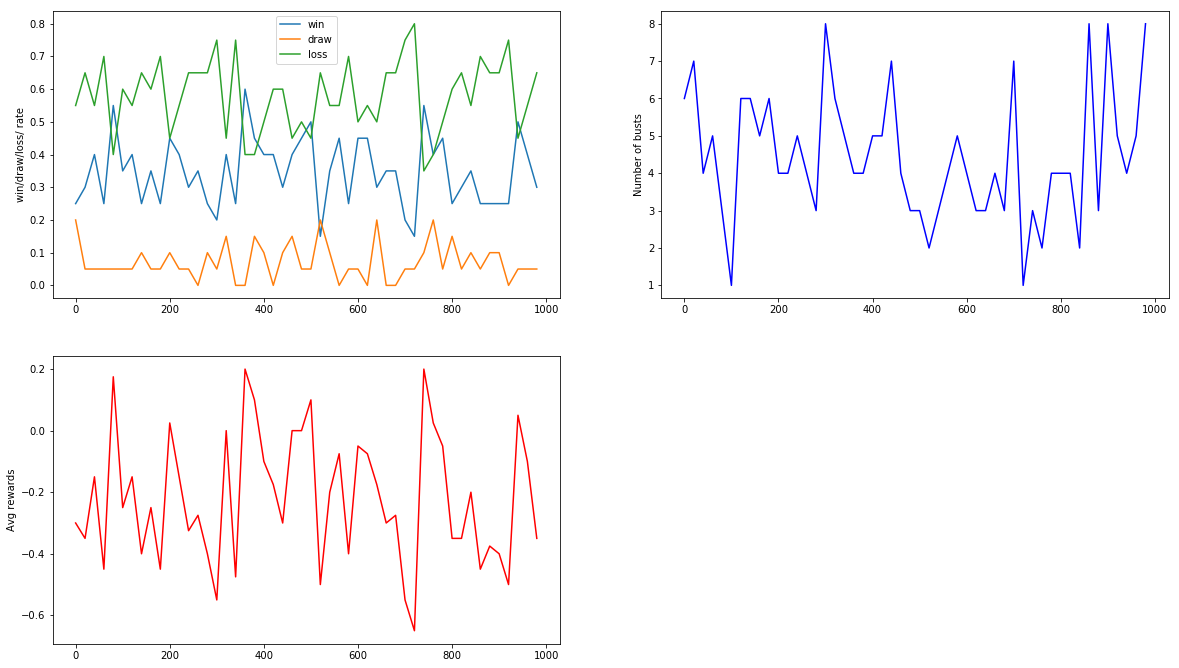

Win = 343, Loss = 588, Draw = 69


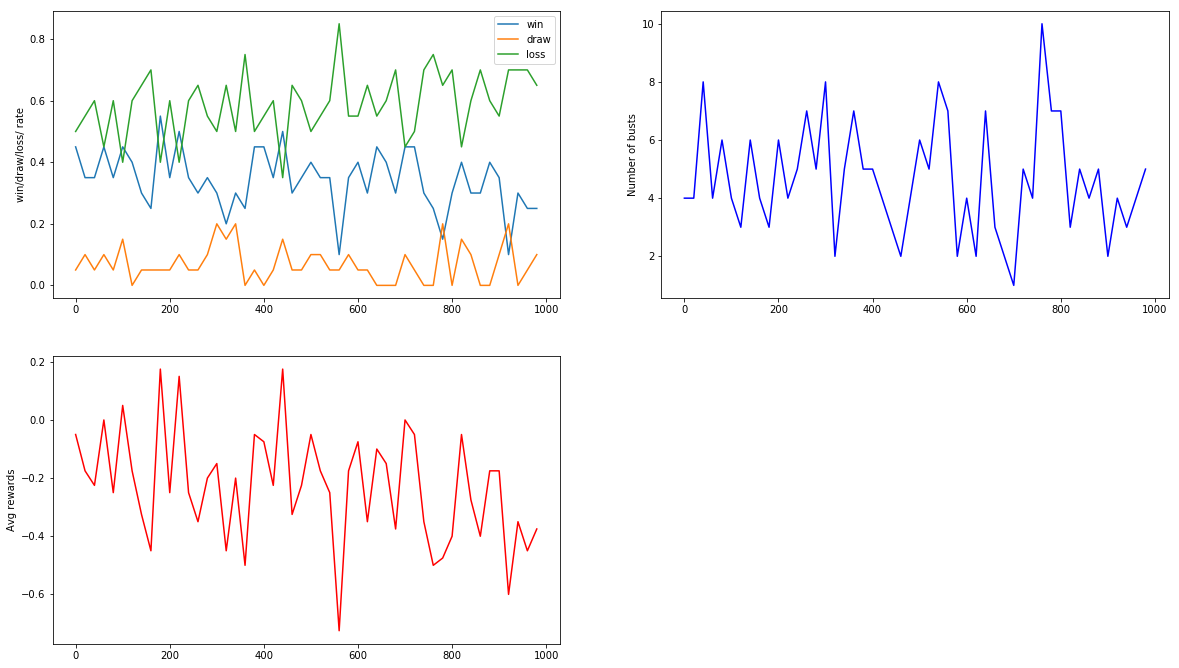

Win = 351, Loss = 601, Draw = 48


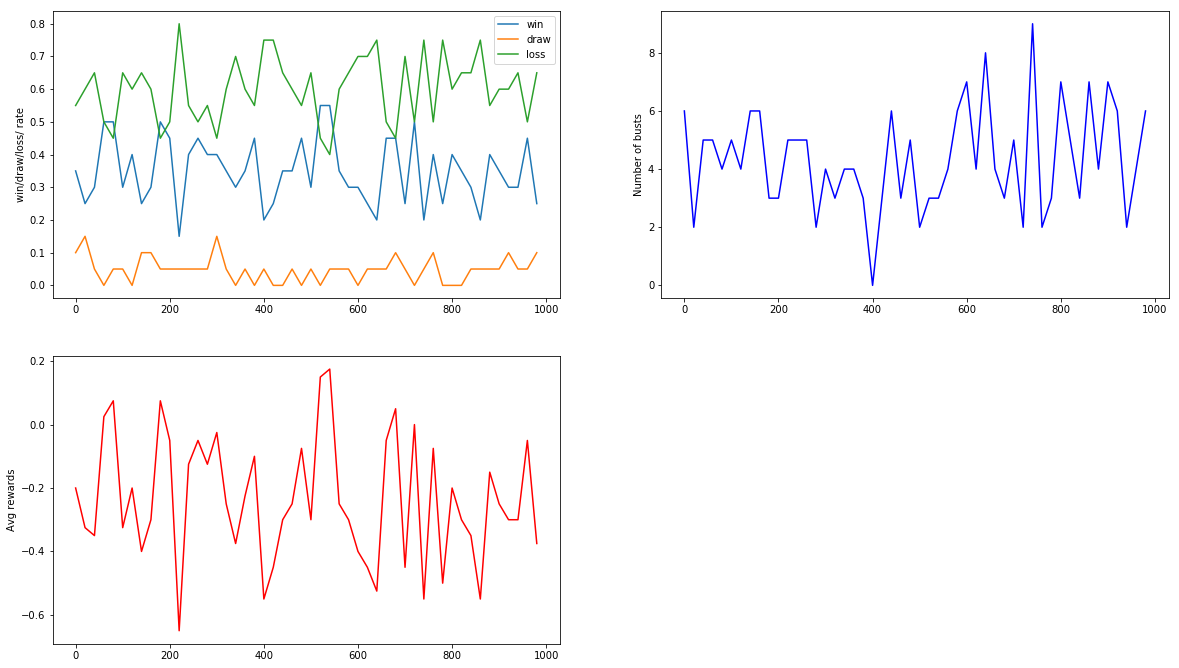

Win = 326, Loss = 630, Draw = 44


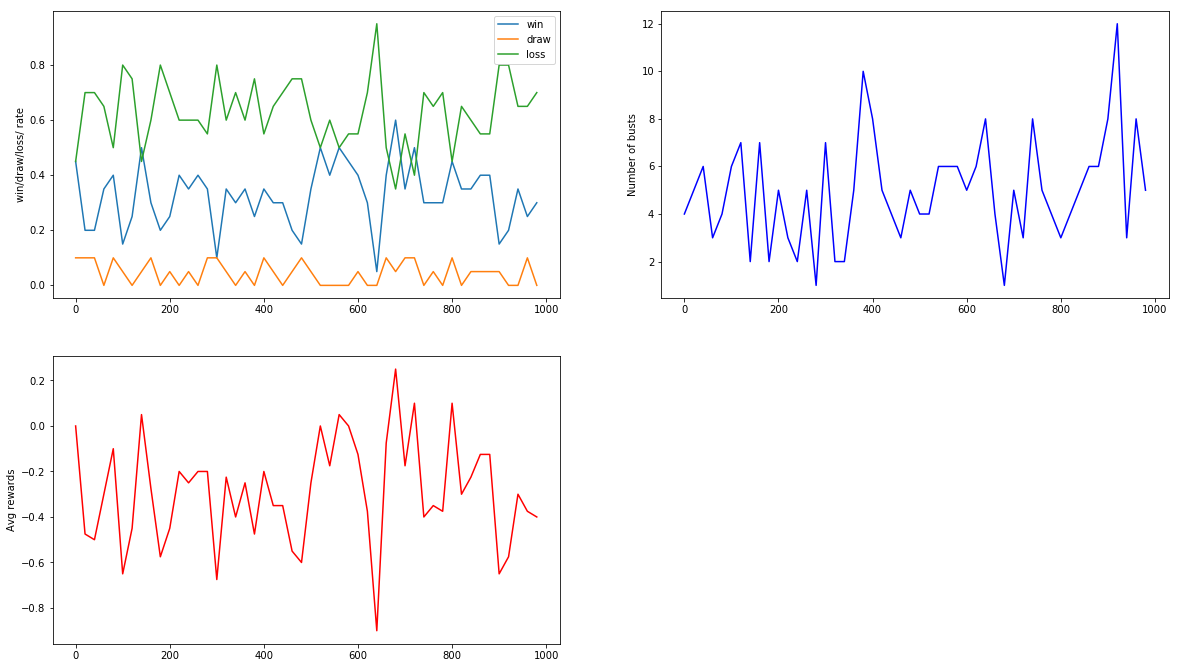

Win = 311, Loss = 634, Draw = 55


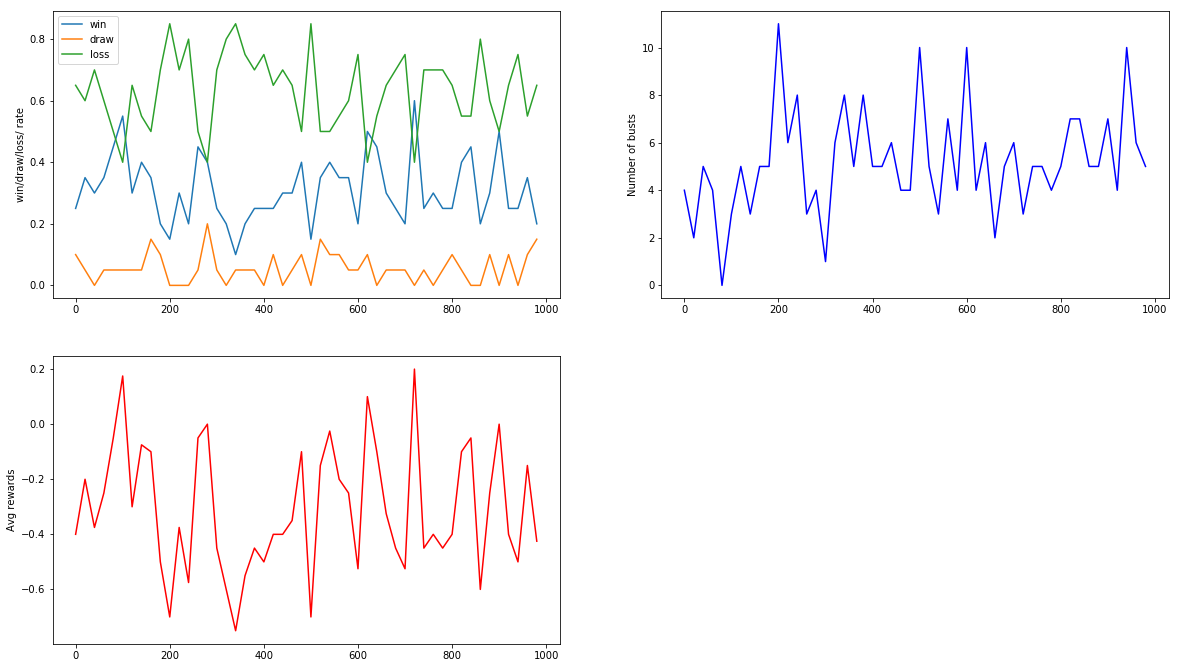

Win = 270, Loss = 679, Draw = 51


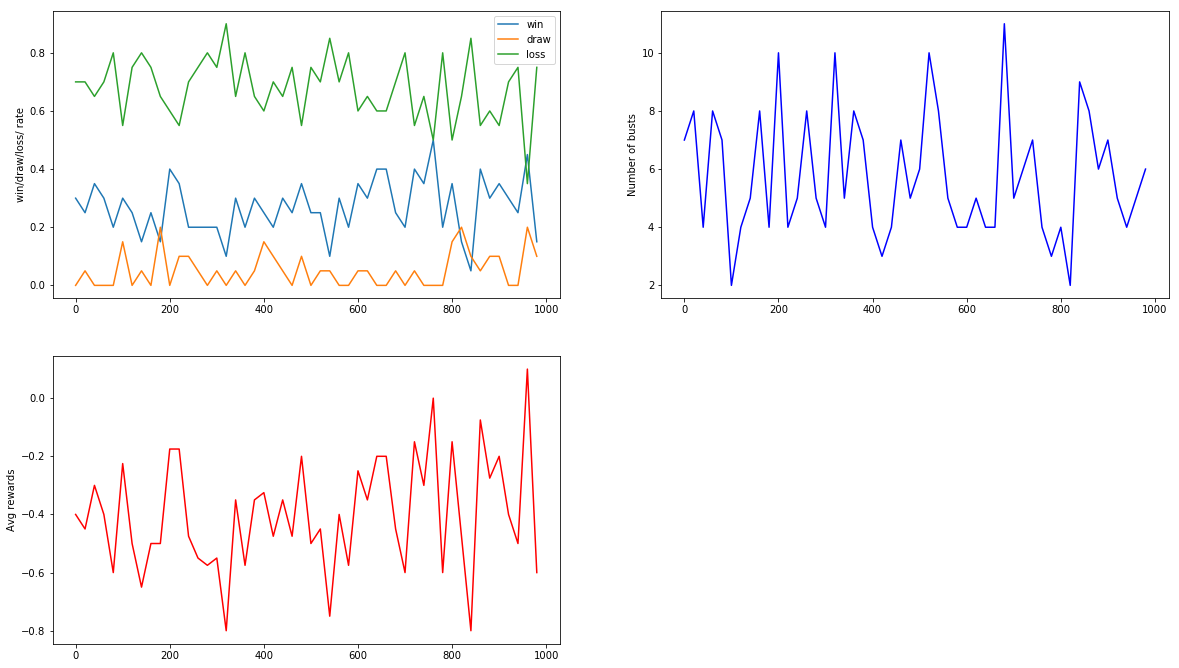

Win = 276, Loss = 679, Draw = 45


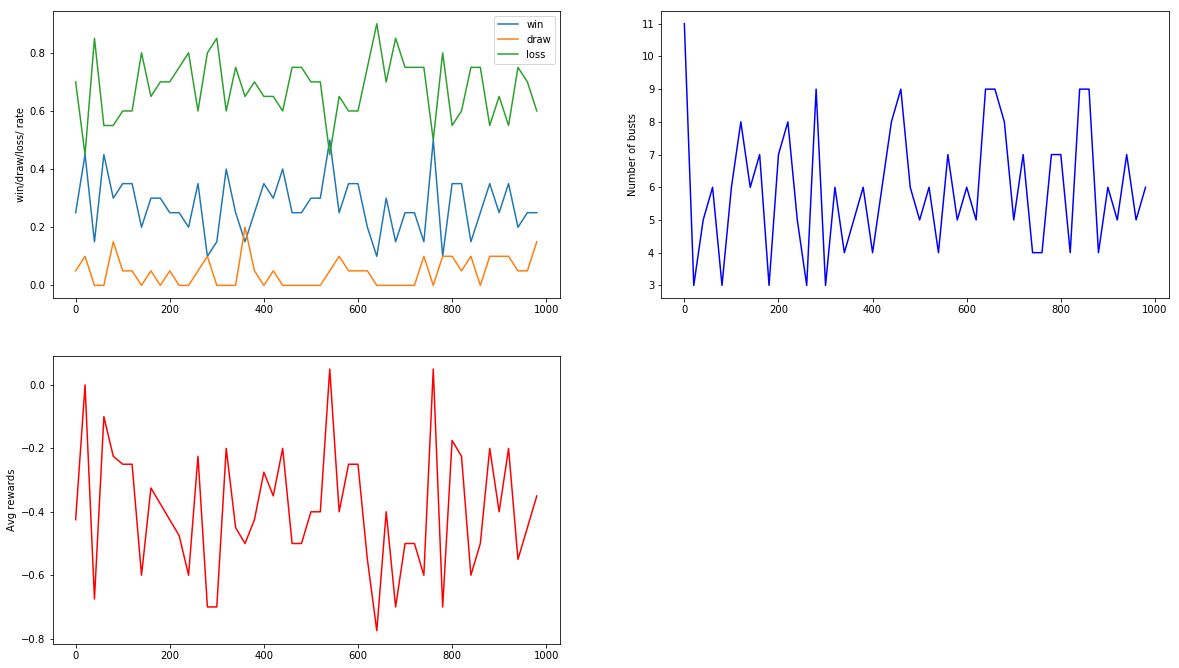

In [141]:
epsilons = np.arange(0.1, 1.1, 0.1)

#fig = plt.figure(figsize=(60,18))
#col = 5
row = math.ceil(len(gammas) / col)

for j, eps in enumerate(gammas):
    maxgames = 1000
    win, loss, draw, rewards, busts = agent.train(gamma=0.99, 
                                                   alpha=0.1, 
                                                   epsilon=eps, 
                                                   maxgames=maxgames)
    
    plot_blackjack(win, loss, draw, rewards, busts, maxgames)
    


** Experiment with Maximum Number of Games **

Win = 381, Loss = 536, Draw = 83


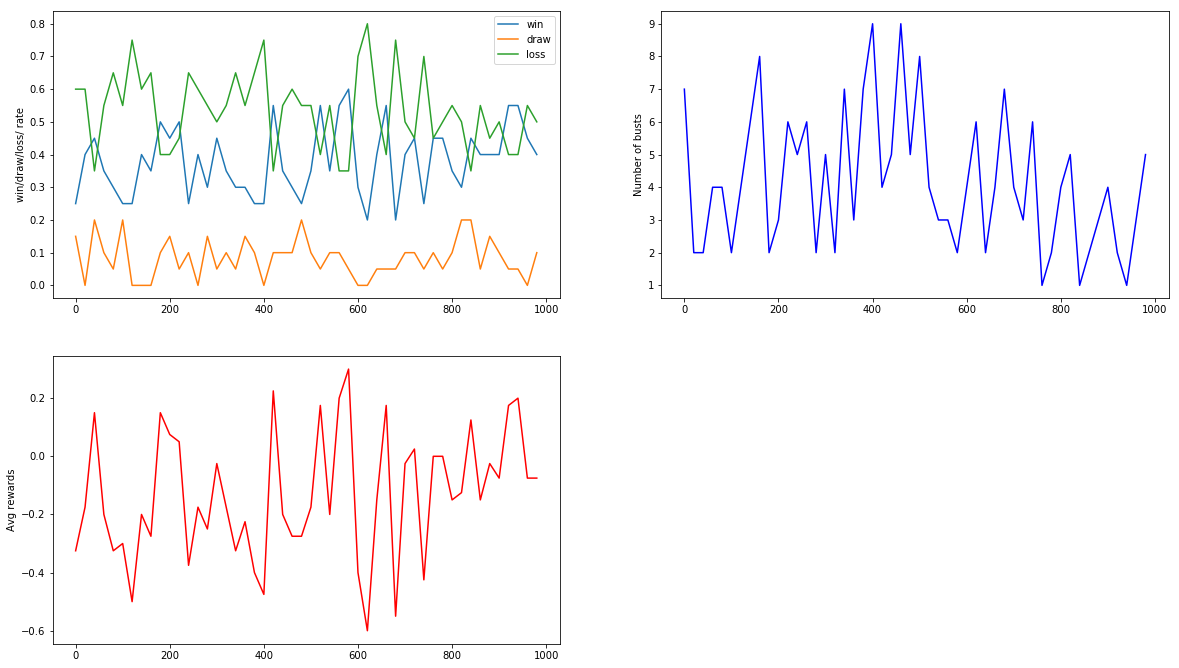

Win = 400, Loss = 515, Draw = 85


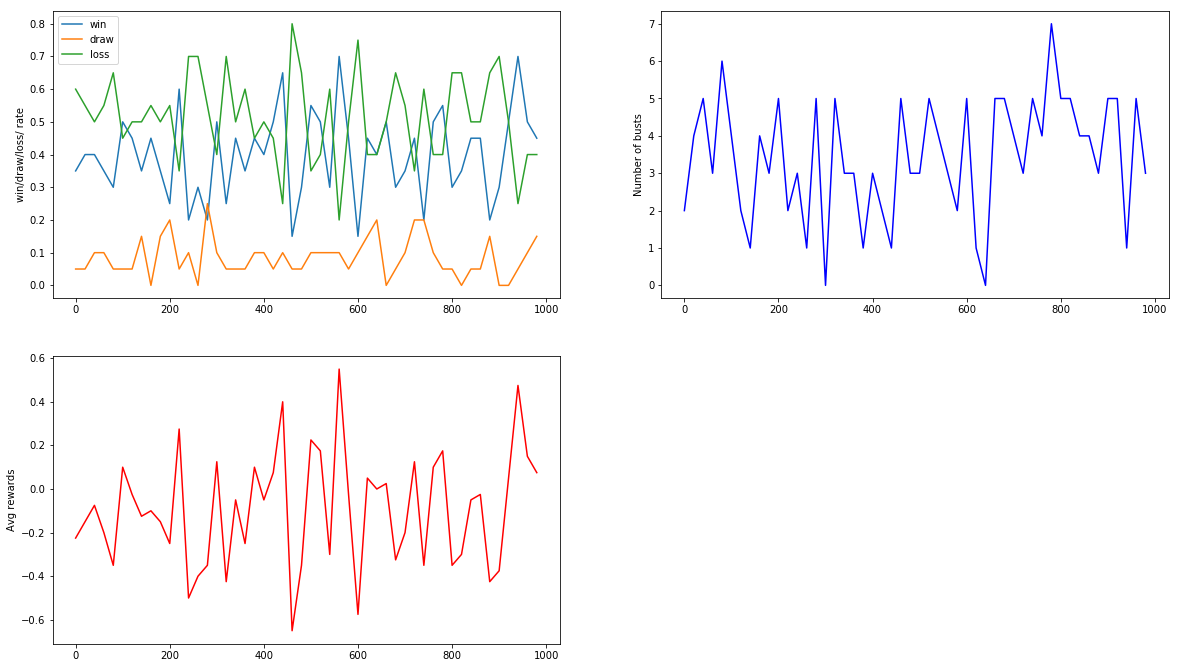

Win = 425, Loss = 512, Draw = 63


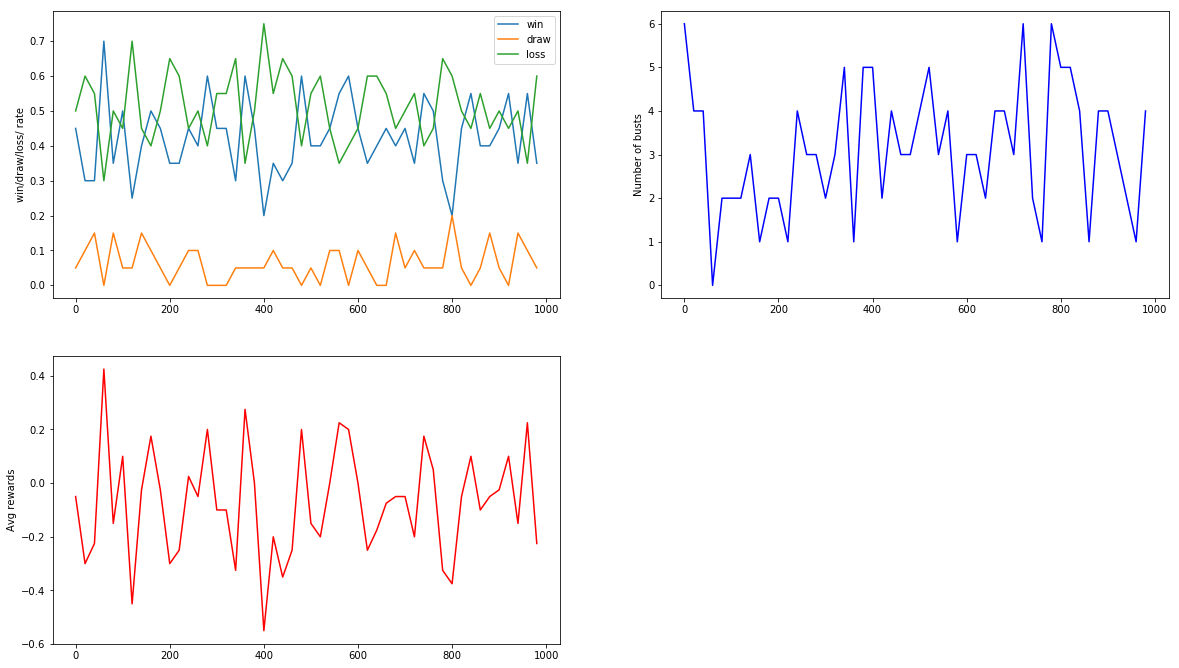

Win = 390, Loss = 518, Draw = 92


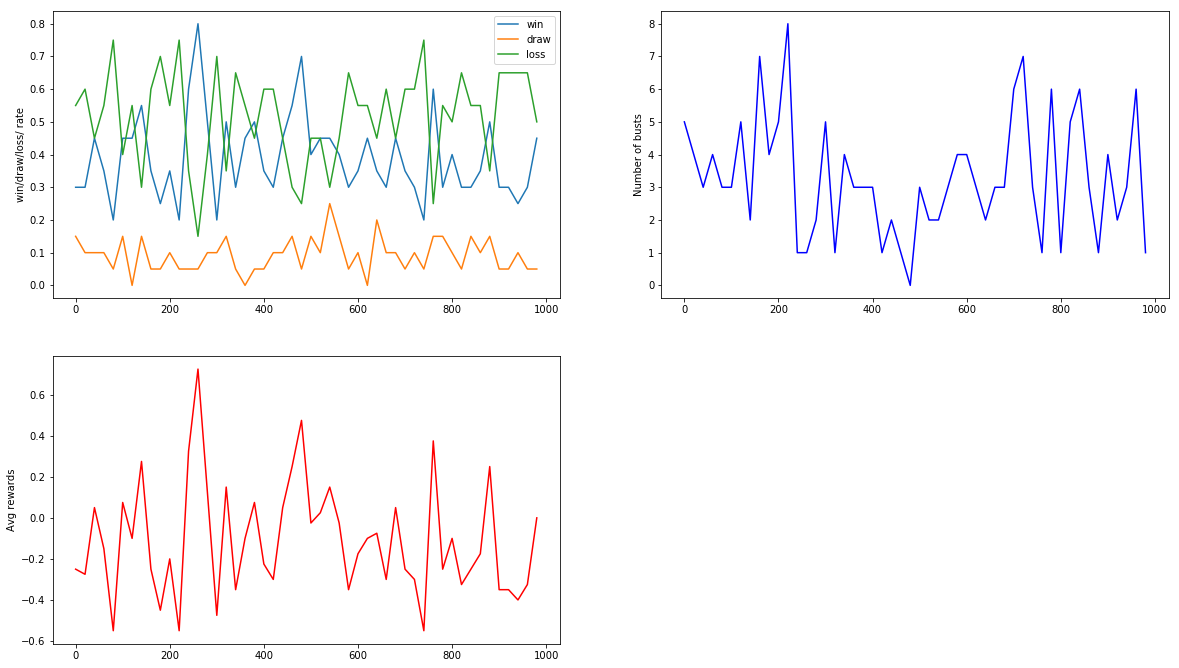

Win = 385, Loss = 521, Draw = 94


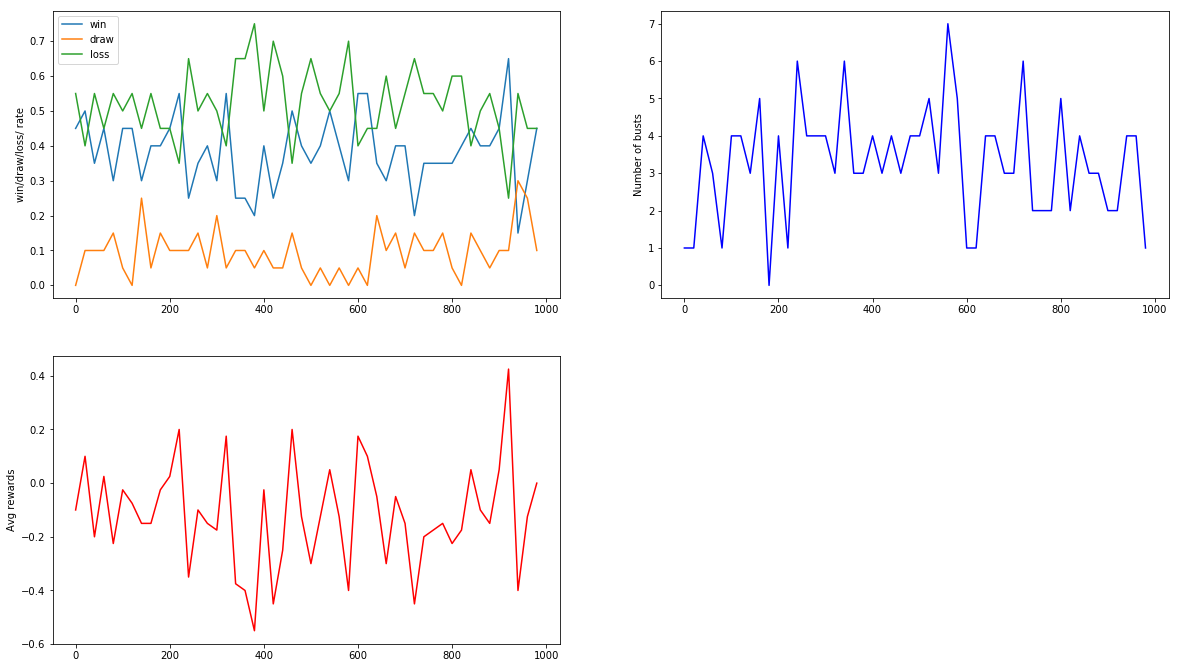

Win = 377, Loss = 544, Draw = 79


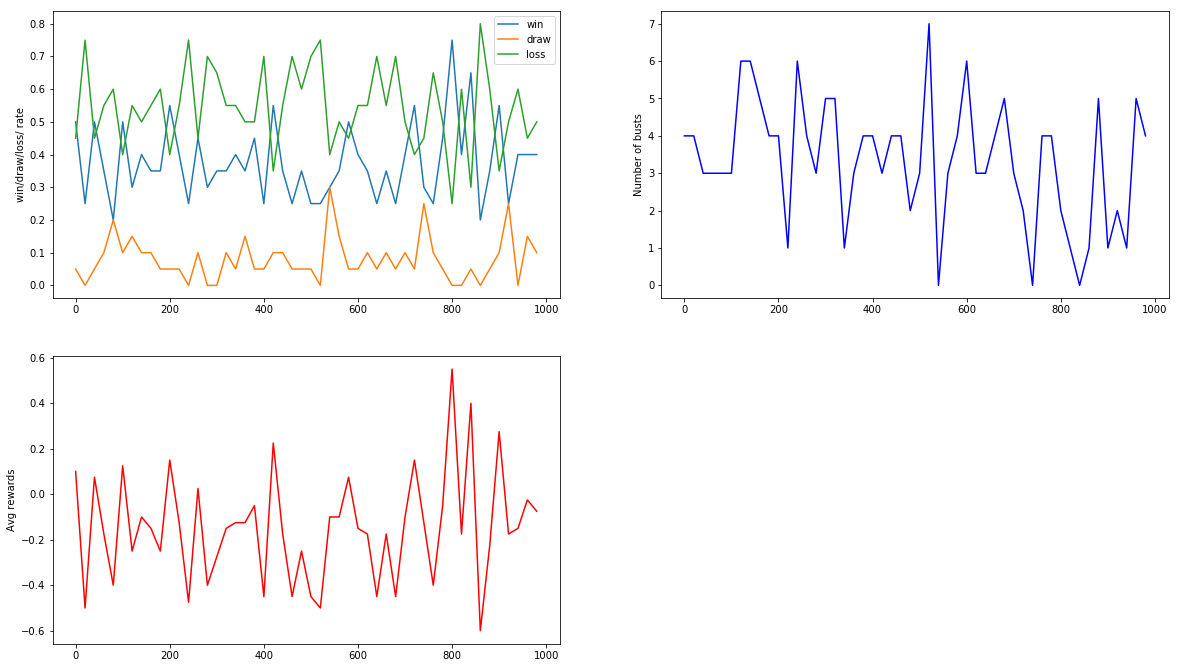

Win = 415, Loss = 503, Draw = 82


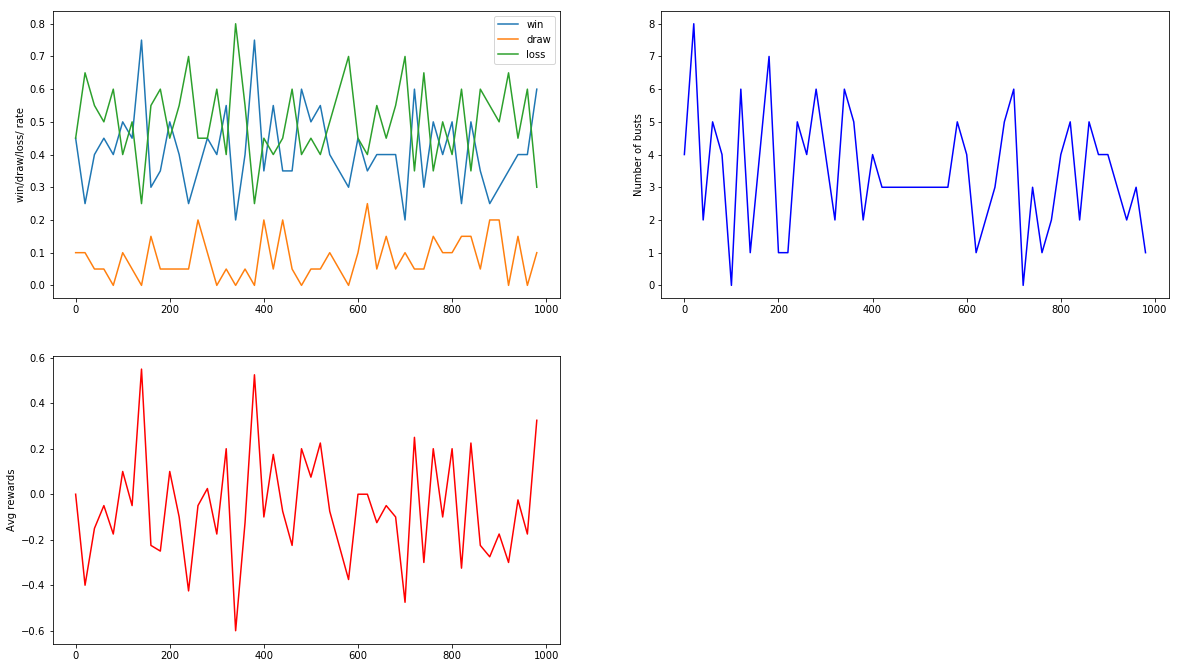

Win = 390, Loss = 514, Draw = 96


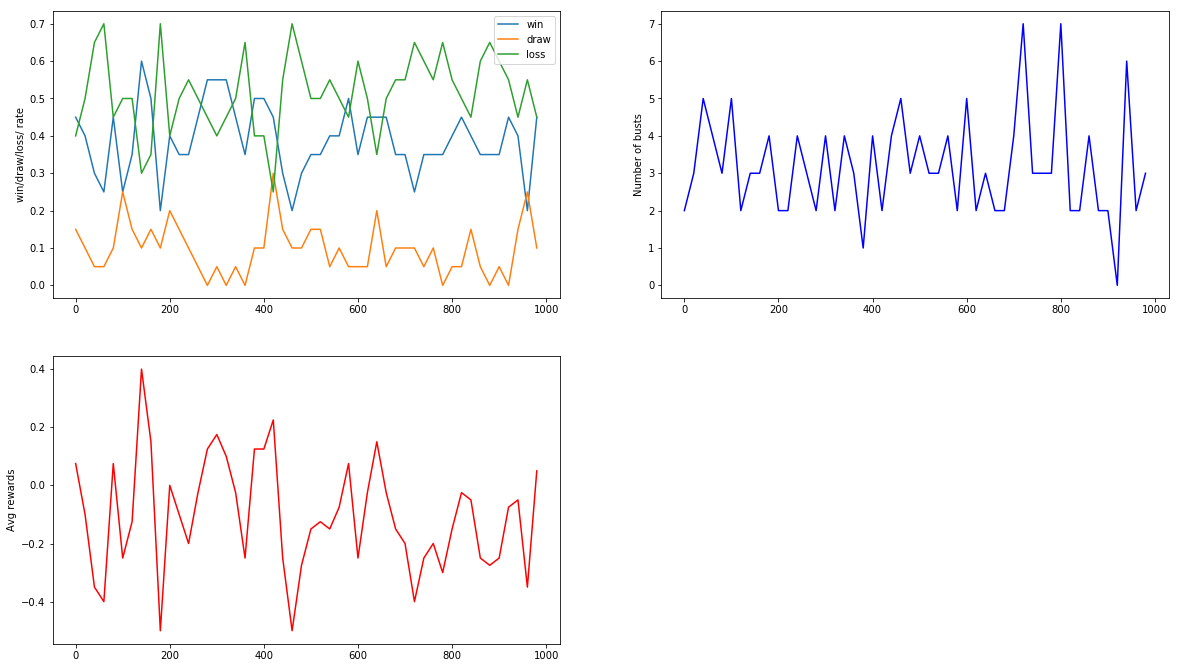

Win = 405, Loss = 509, Draw = 86


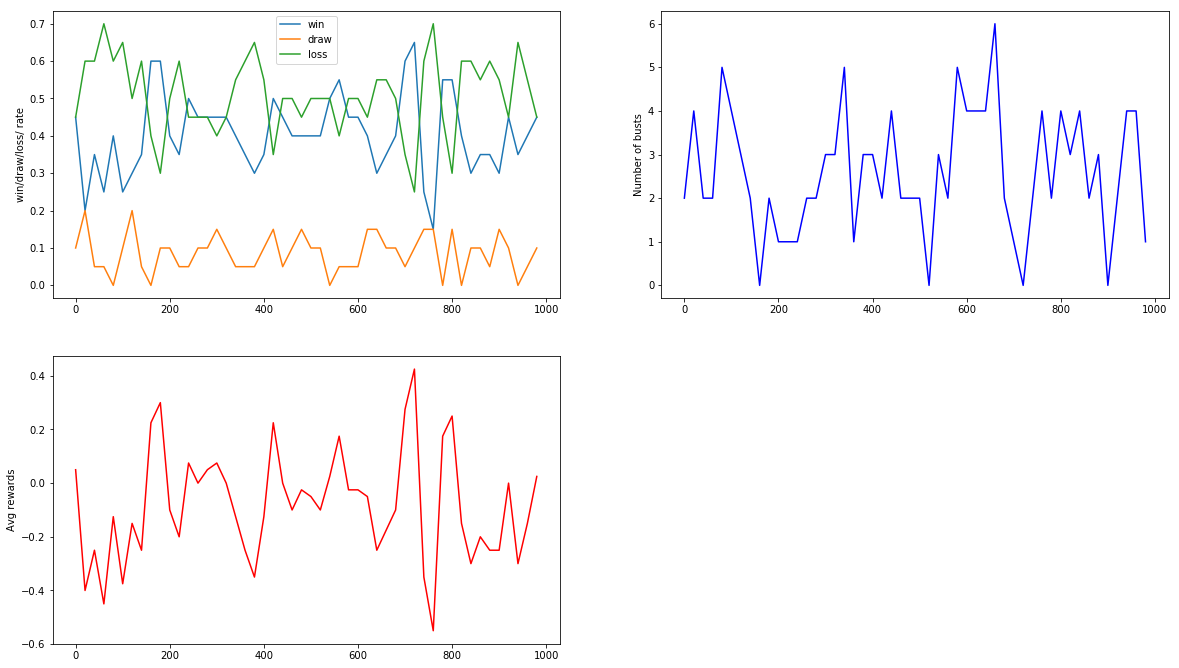

Win = 389, Loss = 520, Draw = 91


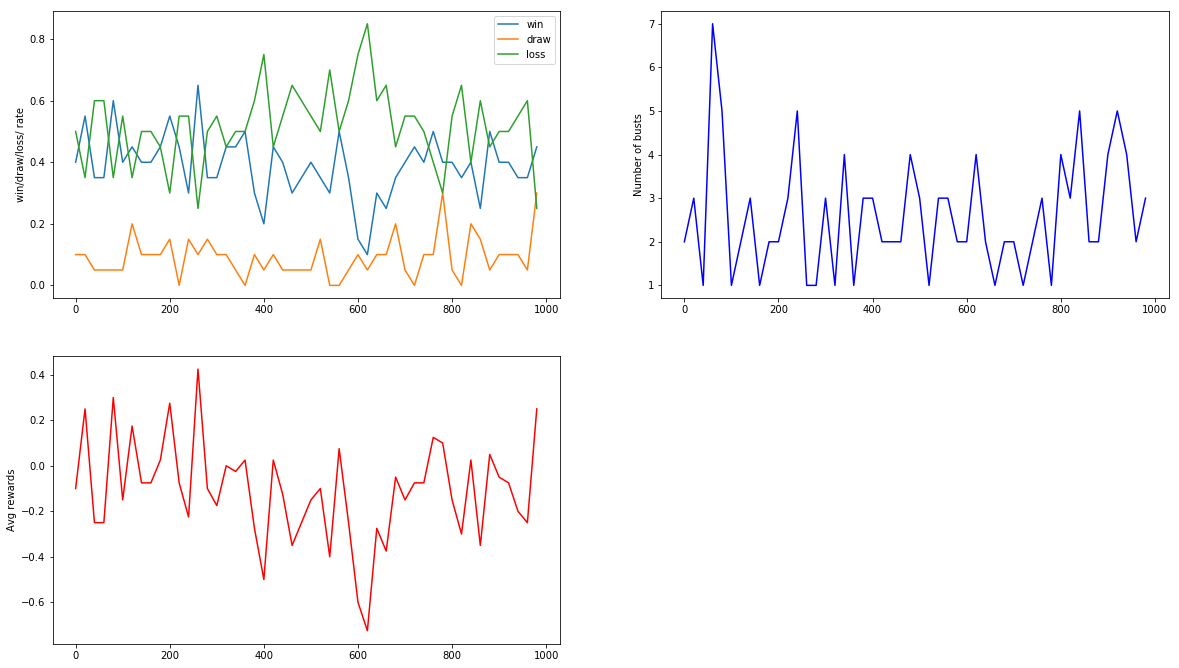

In [144]:
maxgames = np.arange(1000, 11000, 1000)
#fig = plt.figure(figsize=(60,18))
#col = 5
row = math.ceil(len(gammas) / col)

for j, maxgame in enumerate(gammas):
    maxgames = 1000
    win, loss, draw, rewards, busts = agent.train(gamma=0.99, 
                                                   alpha=0.1, 
                                                   epsilon=0.1, 
                                                   maxgames=maxgames)
    
    plot_blackjack(win, loss, draw, rewards, busts, maxgames)
    


###  Expriment to find opitaml combiation of parameters (reading and analysis of learning results and plots) 

From above experiments, we can come up with optimal values for each of the parameters to optimize the prformance & efficiency.

** Combination set 1: **
<br> Lets try with below combination of parameters
<br> γ  = 0.8  α  = 0.25  ϵ  = 0.1 maxgames = 1000

Win = 382, Loss = 535, Draw = 83


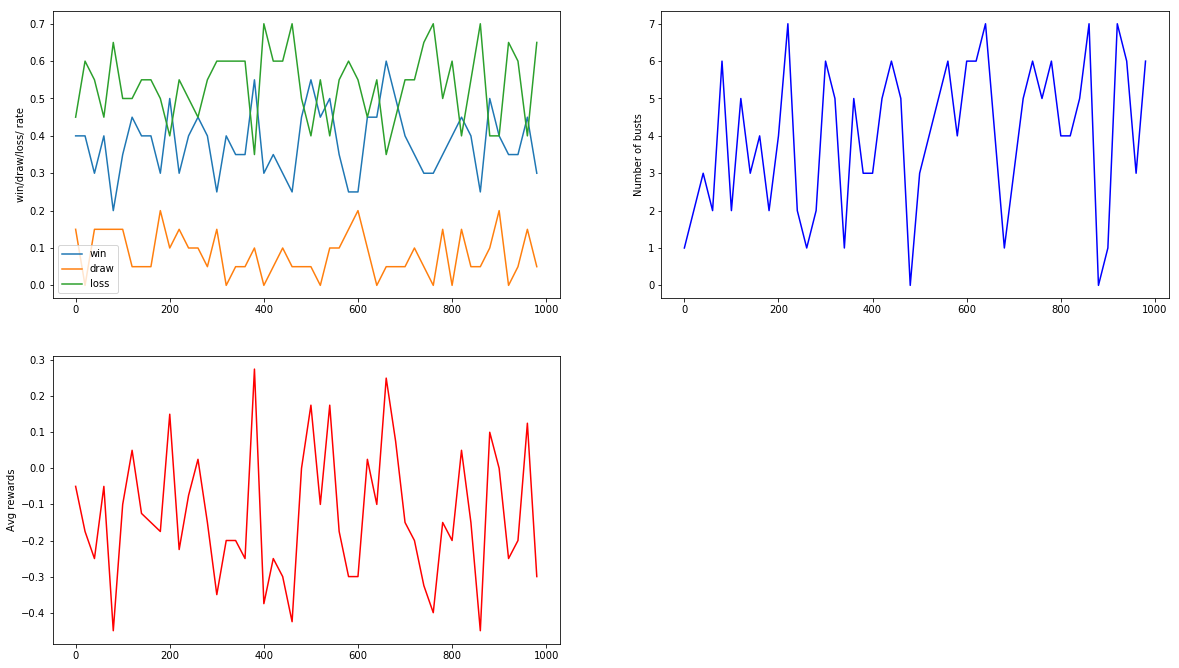

In [142]:
agent = RLA_BlackJack(env)
maxgames = 1000
win, loss, draw, rewards, busts = agent.train(gamma=0.8, 
                                               alpha=0.25, 
                                               epsilon=0.1, 
                                               maxgames=maxgames)
plot_blackjack(win, loss, draw, rewards, busts, maxgames)

** Combination set 2: **
<br> Lets try with below combination of parameters
<br>  γ  = 0.9  α  = 0.26  ϵ  = 0.1 maxgames = 1000

Win = 400, Loss = 523, Draw = 77


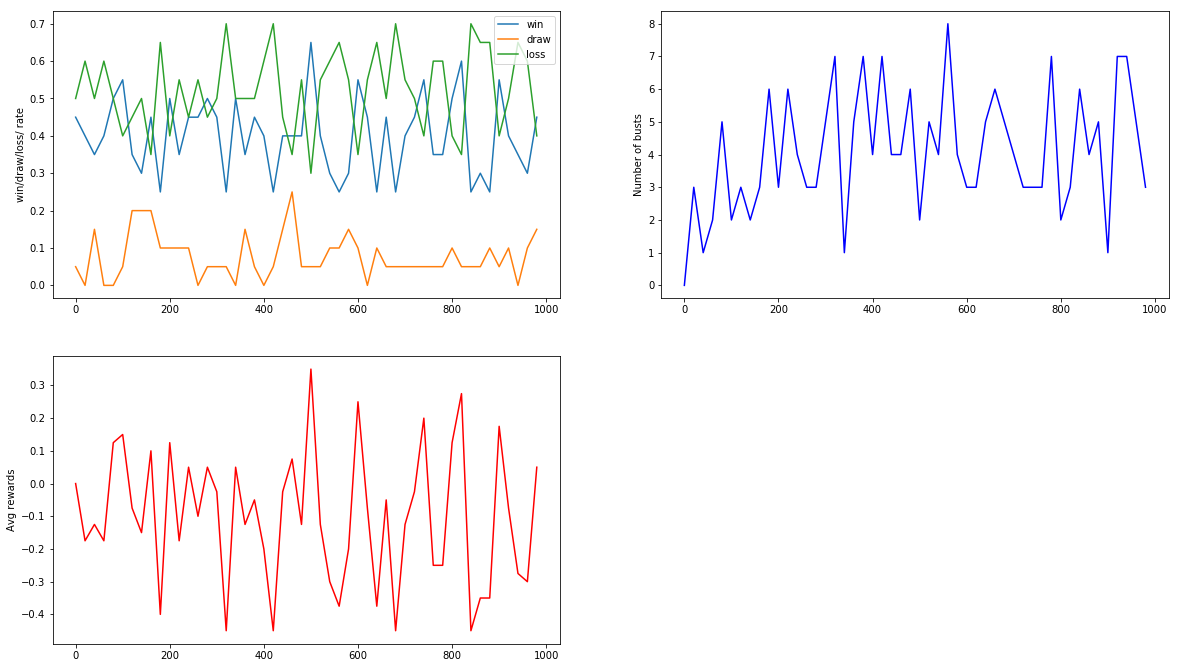

In [143]:
agent = RLA_BlackJack(env)
maxgames = 1000
win, loss, draw, rewards, busts = agent.train(gamma=0.9, 
                                               alpha=0.26, 
                                               epsilon=0.1, 
                                               maxgames=maxgames)
plot_blackjack(win, loss, draw, rewards, busts, maxgames)

# V. Conclusions

Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

This assignment helped in understanding the concepts of Reinforcement Learning, Q learning and TD Learning approaches.
The challenges faced during this assignment are:

<br> Determining the optimal parameters for training
<br> The all other plots were self explanatory but I dindn't understand the significance of contour plot.
I found that this assignment was good practice in learining reinforcement learning. I did find building the Q-tables a bit tricky at first, mostly because I wanted to keep it 2D instead of 3D. However, after few experiments I was able to figure out.
Exprimentation with Black jack.

# References

https://github.com/openai/gym/blob/master/gym/envs/toy_text/blackjack.py


# Extra Credit

- Let us have Blackjack-V0 Tournament in class (Mar 22nd.)!
- Top 4 students will get an extra credit. 
- 2 (or more?) unique training attemps will also get an extra credit. (Sales for it to be considered.) 

## Grading

We will test your notebook with an additional grid.txt file. Please make sure to test in different maze input files. 

points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Maze Problem | 
 | 5| Includes description of maze problem
 | 5| Explains the GridWorld
10 | Blackjack
 | 5| Includes description of maze problem
 | 5| Explains the Backjack-V0 (OpenAI Gym)
25 | Methods | 
 | 5| Review of the SARSA and Q-Learning
 | 5| Choice of TD learning and Reason
 |10| Implementation of the selected approach
 | 5| explanation of the codes
45 | Results 
| 5| Reports the selected parameters for both problems. 
|20| Experimental outputs that show the choice of parameters. How do you choose them? (10 points per each problem)
|10| Output plots (5 for each)
|10| reading and analysis of learning results and plots (5 for each)
5 | Conclusions 
